In [6]:
email = "miryala.vaishnavi"

In [7]:
# ==========================================
# STEP 1: ACTIVATION FUNCTIONS
# ==========================================

class ReLU:
    """
    Rectified Linear Unit activation function.
    f(x) = max(0, x)
    f'(x) = 1 if x > 0, else 0
    """
    
    def __init__(self):
        """Initialize ReLU activation."""
        self.last_input = None
    
    def forward(self, x):
        """
        Forward pass: f(x) = max(0, x)
        
        Args:
            x (numpy.ndarray): Input array
            
        Returns:
            numpy.ndarray: Output after ReLU activation
        """
        self.last_input = x.copy()  # Store for backward pass
        return np.maximum(0, x)
    
    def backward(self, grad_output):
        """
        Backward pass: derivative of ReLU
        f'(x) = 1 if x > 0, else 0
        
        Args:
            grad_output (numpy.ndarray): Gradient from subsequent layer
            
        Returns:
            numpy.ndarray: Gradient with respect to input
        """
        grad_input = grad_output.copy()
        grad_input[self.last_input <= 0] = 0  # Zero gradient where input was <= 0
        return grad_input

# class ReLU:
#     """
#     Rectified Linear Unit activation function.
#     f(x) = max(0, x)
#     f'(x) = 1 if x > 0, else 0
#     """
    
#     def __init__(self):
#         """Initialize ReLU activation."""
#         self.last_input = None
    
#     def forward(self, x):
#         """
#         Forward pass: f(x) = max(0, x)
        
#         Args:
#             x (numpy.ndarray): Input array
            
#         Returns:
#             numpy.ndarray: Output after ReLU activation
#         """
#         self.last_input = x  # Store reference, not copy (to save memory)
#         return np.maximum(0, x)
    
#     def backward(self, grad_output):
#         """
#         Backward pass: derivative of ReLU
#         f'(x) = 1 if x > 0, else 0
        
#         Args:
#             grad_output (numpy.ndarray): Gradient from subsequent layer
            
#         Returns:
#             numpy.ndarray: Gradient with respect to input
#         """
#         # Create mask where input > 0
#         mask = (self.last_input > 0).astype(float)
        
#         # Gradient = grad_output * mask
#         grad_input = grad_output * mask
        
#         return grad_input
class Tanh:
    """
    Hyperbolic tangent activation function.
    f(x) = tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x))
    f'(x) = 1 - tanh^2(x)
    """
    
    def __init__(self):
        """Initialize Tanh activation."""
        self.last_output = None
    
    def forward(self, x):
        """
        Forward pass: f(x) = tanh(x)
        
        Args:
            x (numpy.ndarray): Input array
            
        Returns:
            numpy.ndarray: Output after Tanh activation
        """
        self.last_output = np.tanh(x)
        return self.last_output
    
    def backward(self, grad_output):
        """
        Backward pass: derivative of Tanh
        f'(x) = 1 - tanh^2(x)
        
        Args:
            grad_output (numpy.ndarray): Gradient from subsequent layer
            
        Returns:
            numpy.ndarray: Gradient with respect to input
        """
        return grad_output * (1 - self.last_output ** 2)

class Sigmoid:
    """
    Sigmoid activation function.
    f(x) = 1 / (1 + e^(-x))
    f'(x) = sigmoid(x) * (1 - sigmoid(x))
    """
    
    def __init__(self):
        """Initialize Sigmoid activation."""
        self.last_output = None
    
    def forward(self, x):
        """
        Forward pass: f(x) = 1 / (1 + e^(-x))
        
        Args:
            x (numpy.ndarray): Input array
            
        Returns:
            numpy.ndarray: Output after Sigmoid activation
        """
        # Clip x to prevent overflow in exp(-x)
        x_clipped = np.clip(x, -500, 500)
        self.last_output = 1 / (1 + np.exp(-x_clipped))
        return self.last_output
    
    def backward(self, grad_output):
        """
        Backward pass: derivative of Sigmoid
        f'(x) = sigmoid(x) * (1 - sigmoid(x))
        
        Args:
            grad_output (numpy.ndarray): Gradient from subsequent layer
            
        Returns:
            numpy.ndarray: Gradient with respect to input
        """
        return grad_output * self.last_output * (1 - self.last_output)

class Identity:
    """
    Identity activation function (no activation).
    f(x) = x
    f'(x) = 1
    """
    
    def __init__(self):
        """Initialize Identity activation."""
        pass
    
    def forward(self, x):
        """
        Forward pass: f(x) = x
        
        Args:
            x (numpy.ndarray): Input array
            
        Returns:
            numpy.ndarray: Input unchanged
        """
        return x
    
    def backward(self, grad_output):
        """
        Backward pass: derivative of Identity
        f'(x) = 1
        
        Args:
            grad_output (numpy.ndarray): Gradient from subsequent layer
            
        Returns:
            numpy.ndarray: Gradient unchanged
        """
        return grad_output




In [8]:
# ==========================================
# STEP 2: LINEAR LAYER
# ==========================================

class Linear:
    """
    Linear (fully connected) layer with weights, biases, and activation.
    
    Implements: output = activation(input @ weights + bias)
    """
    
    def __init__(self, input_size, output_size, activation=None):
        """
        Initialize the linear layer.
        
        Args:
            input_size (int): Number of input features
            output_size (int): Number of output features  
            activation: Activation function object (ReLU, Tanh, Sigmoid, Identity)
        """
        self.input_size = input_size
        self.output_size = output_size
        self.activation = activation if activation is not None else Identity()
        
        # Initialize weights using Xavier/Glorot initialization - Weights are initialized randomly. The formula used here is called Xavier/Glorot initialization — it keeps the variance of outputs reasonable so gradients don’t vanish or explode.
        # This helps with gradient flow in deep networks
        limit = np.sqrt(6.0 / (input_size + output_size))
        self.weights = np.random.uniform(-limit, limit, (input_size, output_size))
        self.bias = np.zeros((1, output_size)) # Biases start at zero.
        
        # Storage for forward pass (needed for backward pass)
        # These are placeholders to store values needed for backward pass.
        # During backpropagation, we need the original inputs and outputs to compute gradients.
        
        self.last_input = None # This will store the input x that was given to the layer during the forward pass.
        self.last_linear_output = None # This will store the output before activation → that is, the raw linear combination:z=XW+b 
        self.last_output = None # This will store the final output after the activation function is applied. y=activation(z) 
        
        # Gradient accumulation
        # When backpropagation runs, it will compute how much each weight and bias should be adjusted — that’s the gradient.
        # We initialize them to zero arrays of the same shape as the weights and biases so that we can accumulate gradients over multiple batches if needed. 
        self.grad_weights = np.zeros_like(self.weights)
        self.grad_bias = np.zeros_like(self.bias)
        
        print(f"Linear layer created: {input_size} -> {output_size}, activation: {type(self.activation).__name__}")
    
    def forward(self, x):
        """
        Forward pass through the layer.
        
        Args:
            x (numpy.ndarray): Input of shape (batch_size, input_size)
            
        Returns:
            numpy.ndarray: Output of shape (batch_size, output_size)
        """
        # Store input for backward pass - We store a copy of the input so we can use it later during backpropagation. 
        self.last_input = x.copy()
        
        # Linear transformation: y = x @ W + b 
        self.last_linear_output = x @ self.weights + self.bias
        
        # Apply activation function
        self.last_output = self.activation.forward(self.last_linear_output)
        
        return self.last_output
    
    def backward(self, grad_output):
        """
        Backward pass through the layer.
        
        Args:
            grad_output (numpy.ndarray): Gradient from subsequent layer
            
        Returns:
            numpy.ndarray: Gradient with respect to input
        """
        # Get gradient from activation function
        grad_linear = self.activation.backward(grad_output)
        
        # Compute gradients for weights and bias
        # grad_weights = input^T @ grad_linear
        self.grad_weights += self.last_input.T @ grad_linear
        
        # grad_bias = sum(grad_linear, axis=0) (sum over batch dimension)
        self.grad_bias += np.sum(grad_linear, axis=0, keepdims=True)
        
        # Compute gradient with respect to input
        # grad_input = grad_linear @ weights^T
        grad_input = grad_linear @ self.weights.T
        
        return grad_input
    
    def zero_grad(self):
        """
        Reset accumulated gradients to zero.
        During training, every time we process a batch of data, we compute gradients for that batch.
        If we dont reset them, they will accumulate from previous batches — giving wrong results.
        """
        self.grad_weights.fill(0)
        self.grad_bias.fill(0)
    
    def update_weights(self, learning_rate):
        """
        Update weights and biases using accumulated gradients.
        
        Args:
            learning_rate (float): Learning rate for gradient descent
        """
        self.weights -= learning_rate * self.grad_weights
        self.bias -= learning_rate * self.grad_bias



In [10]:
# ==========================================
# STEP 3: LOSS FUNCTIONS
# ==========================================

class MSELoss:
    """
    Mean Squared Error loss function.
    
    L = (1/n) * sum((y_pred - y_true)^2)
    """
    
    def __init__(self):
        """Initialize MSE loss."""
        self.last_predictions = None
        self.last_targets = None
    
    def forward(self, predictions, targets):
        """
        Compute MSE loss.
        
        Args:
            predictions (numpy.ndarray): Predicted values
            targets (numpy.ndarray): True values
            
        Returns:
            float: MSE loss value
        """
        self.last_predictions = predictions.copy()
        self.last_targets = targets.copy()
        
        # Ensure targets have the same shape as predictions
        if targets.ndim == 1 and predictions.ndim == 2:
            targets = targets.reshape(-1, 1)
        
        # MSE = mean((y_pred - y_true)^2)
        loss = np.mean((predictions - targets) ** 2)
        return loss
    
    def backward(self):
        """
        Compute gradient of MSE loss.
        
        Returns:
            numpy.ndarray: Gradient with respect to predictions
        """
        # d/dy_pred MSE = 2 * (y_pred - y_true) / n
        targets = self.last_targets
        if targets.ndim == 1 and self.last_predictions.ndim == 2:
            targets = targets.reshape(-1, 1)
            
        grad = 2.0 * (self.last_predictions - targets) / self.last_predictions.shape[0]
        return grad

class BCELoss:
    """
    Binary Cross Entropy loss function.
    
    L = -(1/n) * sum(y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred))
    """
    
    def __init__(self):
        """Initialize BCE loss."""
        self.last_predictions = None
        self.last_targets = None
    
    def forward(self, predictions, targets):
        """
        Compute BCE loss.
        
        Args:
            predictions (numpy.ndarray): Predicted probabilities [0, 1]
            targets (numpy.ndarray): True binary labels {0, 1}
            
        Returns:
            float: BCE loss value
        """
        self.last_predictions = predictions.copy()
        self.last_targets = targets.copy()
        
        # Ensure targets have the same shape as predictions
        if targets.ndim == 1 and predictions.ndim == 2:
            targets = targets.reshape(-1, 1)
        
        # Clip predictions to prevent log(0)
        eps = 1e-15
        predictions_clipped = np.clip(predictions, eps, 1 - eps)
        
        # BCE = -mean(y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred))
        loss = -np.mean(targets * np.log(predictions_clipped) + 
                       (1 - targets) * np.log(1 - predictions_clipped))
        return loss
    
    def backward(self):
        """
        Compute gradient of BCE loss.
        
        Returns:
            numpy.ndarray: Gradient with respect to predictions
        """
        targets = self.last_targets
        if targets.ndim == 1 and self.last_predictions.ndim == 2:
            targets = targets.reshape(-1, 1)
        
        # Clip predictions to prevent division by 0
        eps = 1e-15
        predictions_clipped = np.clip(self.last_predictions, eps, 1 - eps)
        
        # d/dy_pred BCE = -(y_true/y_pred - (1-y_true)/(1-y_pred)) / n
        grad = -(targets / predictions_clipped - 
                (1 - targets) / (1 - predictions_clipped)) / self.last_predictions.shape[0]
        return grad



In [11]:
# ==========================================
# STEP 4: MODEL CLASS
# ==========================================

class Model:
    """
    Neural Network Model class that combines layers and handles training.
    """
    
    def __init__(self, layers, loss_function, learning_rate=0.01):
        """
        Initialize the model.
        
        Args:
            layers (list): List of Linear layer objects
            loss_function: Loss function object (MSELoss or BCELoss)
            learning_rate (float): Learning rate for optimization
        """
        self.layers = layers # keeps a reference to all network layers so the model can loop over them for forward and backward passes.
        self.loss_function = loss_function # keeps a reference to the loss function object to compute loss and its gradient.
        self.learning_rate = learning_rate # stored so that when we update weights, we know how big the step is.
        
        # Training history
        self.train_losses = [] # list to store loss values for each training step (so we can plot or monitor learning).
        self.samples_seen = [] # optional, can track how many samples the model has seen if you want to monitor progress.
        
        print(f"Model created with {len(layers)} layers:")
        for i, layer in enumerate(layers): 
            if hasattr(layer, 'input_size') and hasattr(layer, 'output_size'):
                # This is a Linear layer
                print(f"  Layer {i+1}: Linear({layer.input_size} -> {layer.output_size}, {type(layer.activation).__name__})")
            else:
                # This is an activation function
                print(f"  Layer {i+1}: {type(layer).__name__}")
        print(f"Loss function: {type(loss_function).__name__}")
        print(f"Learning rate: {learning_rate}")
    
    def forward(self, x):
        """
        Forward pass through all layers.
        
        Args:
            x (numpy.ndarray): Input data
            
        Returns:
            numpy.ndarray: Model predictions
        """
        output = x # The input x (a NumPy array of shape (batch_size, input_features)) is assigned to output. This will propagate through all layers.
        for i, layer in enumerate(self.layers):
            output = layer.forward(output) # The output of one layer becomes the input for the next layer.
            # print(f"  Layer {i+1} output (after activation):\n{output}")
        return output # After passing through all layers, the final output is the model’s prediction (y_pred).
    
    def backward(self, loss_grad):
        """
        Backward pass through all layers.
        
        Args:
            loss_grad (numpy.ndarray): Gradient from loss function
        """
        grad = loss_grad # loss_grad is the derivative of the loss function with respect to the model’s predictions (dL/dy_pred). Example: if using MSE: grad = 2*(y_pred - y_true)/n
        
        for idx, layer in enumerate(reversed(self.layers)): # Backpropagation works backward from the output layer to the input layer.
            # For each layer:
            # layer.backward(grad) computes:
            # Gradient w.r.t weights: dL/dW
            # Gradient w.r.t bias: dL/db
            # Gradient w.r.t input: dL/dx to pass to the previous layer
            # Updates the cumulative gradients stored in the layer.
            # Returns grad for the next layer backward.
            grad = layer.backward(grad)
            layer_num = len(self.layers) - idx  
            # print(f"  Layer {layer_num} gradients:")
            # print(f"    grad_weights:\n{layer.grad_weights}") # Weight gradients (dL/dW)
            # print(f"    grad_bias:\n{layer.grad_bias}") # Bias gradients (dL/db)
            # print(f"    grad_input (to pass to previous layer):\n{grad}")

    def train_step(self, x, y):
        """
        Perform one training step (forward + backward + accumulate gradients).
        
        Args:
            x (numpy.ndarray): Input data
            y (numpy.ndarray): Target data
            
        Returns:
            float: Loss value for this step
        """
        # Forward pass
        predictions = self.forward(x)
        
        # Compute loss
        loss = self.loss_function.forward(predictions, y)
        
        # Backward pass
        loss_grad = self.loss_function.backward()
        self.backward(loss_grad)
        
        return loss
    
    def zero_grad(self):
        """Reset gradients in all layers."""
        for layer in self.layers:
            layer.zero_grad()
    
    def update_weights(self):
        """Update weights in all layers and reset gradients."""
        for layer in self.layers:
            layer.update_weights(self.learning_rate)
        self.zero_grad()
    
    def predict(self, x):
        """
        Make predictions without training.
        
        Args:
            x (numpy.ndarray): Input data
            
        Returns:
            numpy.ndarray: Model predictions
        """
        return self.forward(x)
    
    def save_to(self, path):
        """
        Save model parameters to file.
        
        Args:
            path (str): File path to save to
        """
        save_dict = {} # Create an empty dictionary to store everything we want to save.
        
        # Save layer parameters
        for i, layer in enumerate(self.layers):
            save_dict[f'layer_{i}_weights'] = layer.weights 
            save_dict[f'layer_{i}_bias'] = layer.bias
            save_dict[f'layer_{i}_input_size'] = layer.input_size
            save_dict[f'layer_{i}_output_size'] = layer.output_size
            save_dict[f'layer_{i}_activation'] = type(layer.activation).__name__
        
        # Save model metadata
        save_dict['num_layers'] = len(self.layers)
        save_dict['learning_rate'] = self.learning_rate
        save_dict['loss_function'] = type(self.loss_function).__name__
        
        np.savez(path, **save_dict)
        print(f"Model saved to {path}")
    
    def load_from(self, path):
        """
        Load model parameters from file.
        
        Args:
            path (str): File path to load from
        """
        data = np.load(path, allow_pickle=True)
        
        # Verify architecture matches # Prevents accidentally loading weights into the wrong architecture.
        if data['num_layers'] != len(self.layers):
            raise ValueError(f"Architecture mismatch: saved model has {data['num_layers']} layers, "
                           f"current model has {len(self.layers)} layers")
        
        # Load layer parameters
        # For each layer:
        # Load the saved weights and bias.
        # Check if the shapes match the current model’s layers.
        # If not → raise an error (prevents crashes).
        # Copy the values into the current model’s layers.
        for i, layer in enumerate(self.layers):
            # Check dimensions match
            saved_weights = data[f'layer_{i}_weights']
            if saved_weights.shape != layer.weights.shape:
                raise ValueError(f"Weight shape mismatch in layer {i}: "
                               f"saved {saved_weights.shape}, current {layer.weights.shape}")
            
            saved_bias = data[f'layer_{i}_bias']
            if saved_bias.shape != layer.bias.shape:
                raise ValueError(f"Bias shape mismatch in layer {i}: "
                               f"saved {saved_bias.shape}, current {layer.bias.shape}")
            
            # Load parameters
            layer.weights = saved_weights.copy()
            layer.bias = saved_bias.copy()
        
        print(f"Model loaded from {path}")
        print(f"Architecture verified: {len(self.layers)} layers match")




In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
import os


# ============================================================================
# SECTION 2.2: Feature Expansion Functions
# ============================================================================

def get_raw(coords):
    """Raw mapping: just return coordinates as-is"""
    return coords


def get_polynomial(coords, order=5):
    """Polynomial expansion up to given order"""
    x = coords[:, 0:1]
    y = coords[:, 1:2]
    
    features = [x, y]
    
    for k in range(2, order + 1):
        features.append(x ** k)
        features.append(y ** k)
    
    return np.concatenate(features, axis=1)


def get_fourier(coords, freq=10):
    """Fourier feature mapping - practical version"""
    x = coords[:, 0:1]
    y = coords[:, 1:2]
    
    features = [np.ones_like(x)]
    
    for f in range(1, freq + 1):
        features.append(np.sin(2 * np.pi * f * x))
        features.append(np.cos(2 * np.pi * f * x))
    
    for f in range(1, freq + 1):
        features.append(np.sin(2 * np.pi * f * y))
        features.append(np.cos(2 * np.pi * f * y))
    
    return np.concatenate(features, axis=1)


def normalize_features(features, method):
    """Normalize features based on method"""
    if method == "Raw":
        return features
    elif method == "Polynomial":
        mean = np.mean(features, axis=0, keepdims=True)
        std = np.std(features, axis=0, keepdims=True) + 1e-8
        return (features - mean) / std
    elif method == "Fourier":
        return features
    return features


# ============================================================================
# SECTION 2.3: Modular Data Loader
# ============================================================================

def Modular_Dataloader(img_path, image_type, method, order=5, freq=10):
    """
    Load image and prepare features based on method
    """
    img = Image.open(img_path)
    
    if image_type == "Gray":
        img = img.convert('L')
        img_array = np.array(img, dtype=np.float32) / 255.0
        img_array = img_array[:, :, np.newaxis]
    else:  # RGB
        img = img.convert('RGB')
        img = img.resize((256, 256))
        img_array = np.array(img, dtype=np.float32) / 255.0
    
    h, w = img_array.shape[:2]
    
    # Create normalized coordinates [0, 1]
    x_coords = np.linspace(0, 1, w)
    y_coords = np.linspace(0, 1, h)
    xx, yy = np.meshgrid(x_coords, y_coords)
    
    coords = np.stack([xx.flatten(), yy.flatten()], axis=1)
    targets = img_array.reshape(-1, img_array.shape[-1])
    
    # Apply feature mapping
    if method == "Raw":
        features = get_raw(coords)
    elif method == "Polynomial":
        features = get_polynomial(coords, order=order)
    elif method == "Fourier":
        features = get_fourier(coords, freq=freq)
    else:
        raise ValueError(f"Unknown method: {method}")
    
    features = normalize_features(features, method)
    
    return features, targets, img_array, h, w


# ============================================================================
# SECTION 2.4: Training with Full Tracking
# ============================================================================

def train_with_full_tracking(features, targets, h, w, method_name, 
                             hidden_sizes=[64, 128, 128],
                             epochs=50, learning_rate=0.01, 
                             batch_size=1024, save_every=1):
    """
    Train MLP and save predictions at every epoch for GIF creation
    
    Returns:
        model: trained model
        losses: list of losses per epoch
        epoch_times: list of times per epoch
        saved_images: list of reconstructed images at each epoch (for GIF)
        n_params: number of input parameters
    """
    # Import your classes (adjust import as needed)
    # from q1_classes import Linear, ReLU, Sigmoid, Model, MSELoss
    
    input_size = features.shape[1]
    output_size = targets.shape[1]
    n_params = input_size  # Number of input parameters
    
    # Build network
    layers = []
    prev_size = input_size
    
    for hidden_size in hidden_sizes:
        layers.append(Linear(prev_size, hidden_size, activation=ReLU()))
        prev_size = hidden_size
    
    layers.append(Linear(prev_size, output_size, activation=Sigmoid()))
    
    model = Model(layers, MSELoss(), learning_rate=learning_rate)
    
    # Training tracking
    n_samples = features.shape[0]
    losses = []
    epoch_times = []
    saved_images = []
    
    print(f"\n{'='*70}")
    print(f"Training: {method_name}")
    print(f"{'='*70}")
    print(f"Input features: {input_size}")
    print(f"Hidden layers: {hidden_sizes}")
    print(f"Output size: {output_size}")
    print(f"Total samples: {n_samples}, Batch size: {batch_size}, Epochs: {epochs}")
    print(f"{'='*70}\n")
    
    for epoch in range(epochs):
        start_time = time.time()
        epoch_loss = 0
        n_batches = 0
        
        # Shuffle
        indices = np.random.permutation(n_samples)
        
        # Mini-batch training
        for i in range(0, n_samples, batch_size):
            batch_indices = indices[i:i+batch_size]
            batch_features = features[batch_indices]
            batch_targets = targets[batch_indices]
            
            loss = model.train_step(batch_features, batch_targets)
            epoch_loss += loss
            n_batches += 1
        
        # Update weights
        model.update_weights()
        
        avg_loss = epoch_loss / n_batches
        epoch_time = time.time() - start_time
        
        losses.append(avg_loss)
        epoch_times.append(epoch_time)
        
        # Save prediction for this epoch (for GIF)
        if epoch % save_every == 0 or epoch == epochs - 1:
            preds = model.predict(features)
            img_pred = preds.reshape(h, w, -1)
            saved_images.append(img_pred.copy())
        
        # Print progress
        if (epoch + 1) % 10 == 0 or epoch == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch+1:3d}/{epochs} | Loss: {avg_loss:.6f} | Time: {epoch_time:.3f}s")
    
    print(f"\n{'='*70}")
    print(f"Training Complete! Final Loss: {losses[-1]:.6f}")
    print(f"Average Epoch Time: {np.mean(epoch_times):.3f}s")
    print(f"{'='*70}\n")
    
    return model, losses, epoch_times, saved_images, n_params


# ============================================================================
# RUN ALL EXPERIMENTS FOR 2.4
# ============================================================================

def run_section_2_4(img_path, image_type, epochs, email="miryala.vaishnavi"):
    """
    Run complete Section 2.4 experiments
    """
    results = {}
    
    # ========== RAW FEATURES (BASELINE) ==========
    print("\n" + "█"*80)
    print("█" + " "*30 + "RAW FEATURES (BASELINE)" + " "*26 + "█")
    print("█"*80)
    
    features, targets, img_array, h, w = Modular_Dataloader(
        img_path, image_type, "Raw"
    )
    
    model, losses, times, images, n_params = train_with_full_tracking(
        features, targets, h, w, "Raw", 
        hidden_sizes=[64, 128, 128], epochs=epochs, learning_rate=0.01
    )
    
    results['Raw'] = {
        'model': model, 'losses': losses, 'times': times, 
        'images': images, 'n_params': n_params,
        'final_loss': losses[-1], 'avg_time': np.mean(times),
        'h': h, 'w': w, 'img_array': img_array
    }
    
    # ========== POLYNOMIAL FEATURES ==========
    for order in [5, 15, 25]:
        print("\n" + "█"*80)
        print("█" + f" "*25 + f"POLYNOMIAL FEATURES (order={order})" + " "*(25 - len(str(order))) + "█")
        print("█"*80)
        
        features, targets, img_array, h, w = Modular_Dataloader(
            img_path, image_type, "Polynomial", order=order
        )
        
        model, losses, times, images, n_params = train_with_full_tracking(
            features, targets, h, w, f"Polynomial (order={order})", 
            hidden_sizes=[64, 128, 128], epochs=epochs, learning_rate=0.01
        )
        
        results[f'Polynomial-{order}'] = {
            'model': model, 'losses': losses, 'times': times, 
            'images': images, 'n_params': n_params,
            'final_loss': losses[-1], 'avg_time': np.mean(times),
            'h': h, 'w': w, 'img_array': img_array
        }
    
    # ========== FOURIER FEATURES ==========
    for freq in [5, 15, 25]:
        print("\n" + "█"*80)
        print("█" + f" "*25 + f"FOURIER FEATURES (freq={freq})" + " "*(26 - len(str(freq))) + "█")
        print("█"*80)
        
        features, targets, img_array, h, w = Modular_Dataloader(
            img_path, image_type, "Fourier", freq=freq
        )
        
        model, losses, times, images, n_params = train_with_full_tracking(
            features, targets, h, w, f"Fourier (freq={freq})", 
            hidden_sizes=[64, 128, 128], epochs=epochs, learning_rate=0.01
        )
        
        results[f'Fourier-{freq}'] = {
            'model': model, 'losses': losses, 'times': times, 
            'images': images, 'n_params': n_params,
            'final_loss': losses[-1], 'avg_time': np.mean(times),
            'h': h, 'w': w, 'img_array': img_array
        }
    
    return results


# ============================================================================
# TABULATION OF RESULTS
# ============================================================================

def create_results_table(results, email="miryala.vaishnavi"):
    """Create comparison table as required"""
    print("\n" + "="*90)
    print(" "*30 + "RESULTS COMPARISON TABLE")
    print("="*90)
    print(f"{'Method':<25} {'Final Loss':<18} {'Avg Epoch Time (s)':<22} {'Input Parameters':<18}")
    print("-"*90)
    
    for method_name, data in results.items():
        print(f"{method_name:<25} {data['final_loss']:<18.8f} {data['avg_time']:<22.4f} {data['n_params']:<18}")
    
    print("="*90)
    
    # Save to file
    with open(f'results_table_{email}.txt', 'w') as f:
        f.write("="*90 + "\n")
        f.write(" "*30 + "RESULTS COMPARISON TABLE\n")
        f.write("="*90 + "\n")
        f.write(f"{'Method':<25} {'Final Loss':<18} {'Avg Epoch Time (s)':<22} {'Input Parameters':<18}\n")
        f.write("-"*90 + "\n")
        
        for method_name, data in results.items():
            f.write(f"{method_name:<25} {data['final_loss']:<18.8f} {data['avg_time']:<22.4f} {data['n_params']:<18}\n")
        
        f.write("="*90 + "\n")
    
    print(f"\nTable saved to: results_table_{email}.txt")


# ============================================================================
# GIF GENERATION WITH LOSS CURVES
# ============================================================================

def create_comparison_gif(results, selected_methods, gif_name, email="miryala.vaishnavi", fps=5):
    """
    Create 1x3 subplot GIF with loss curves
    
    Args:
        results: dictionary with all results
        selected_methods: list of 3 method names ['Raw', 'Polynomial-15', 'Fourier-15']
        gif_name: output filename
        email: email for watermark
        fps: frames per second
    """
    print(f"\nCreating GIF with methods: {selected_methods}")
    
    # Get data for selected methods
    methods_data = [results[m] for m in selected_methods]
    n_epochs = len(methods_data[0]['images'])
    
    # Prepare figure
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), 
                            gridspec_kw={'height_ratios': [3, 1]})
    
    # Setup image axes (top row)
    img_axes = axes[0]
    for ax in img_axes:
        ax.axis('off')
    
    # Setup loss axes (bottom row)
    loss_axes = axes[1]
    
    frames = []
    
    for epoch_idx in range(n_epochs):
        # Clear previous content
        for ax in img_axes:
            ax.clear()
            ax.axis('off')
        for ax in loss_axes:
            ax.clear()
        
        # Plot images and loss curves for each method
        for col, (method_name, data) in enumerate(zip(selected_methods, methods_data)):
            # Top: Image reconstruction
            img = data['images'][epoch_idx]
            img_axes[col].imshow(img.squeeze(), cmap='gray' if img.shape[-1] == 1 else None, vmin=0, vmax=1)
            img_axes[col].set_title(f"{method_name}\nEpoch {epoch_idx + 1}/{n_epochs}", fontsize=12, fontweight='bold')
            img_axes[col].axis('off')
            
            # Bottom: Loss curve
            epochs_so_far = list(range(1, epoch_idx + 2))
            losses_so_far = data['losses'][:epoch_idx + 1]
            
            loss_axes[col].plot(epochs_so_far, losses_so_far, 'b-', linewidth=2)
            loss_axes[col].scatter([epoch_idx + 1], [losses_so_far[-1]], color='red', s=100, zorder=5)
            loss_axes[col].set_xlabel('Epoch', fontsize=10)
            loss_axes[col].set_ylabel('Loss (MSE)', fontsize=10)
            loss_axes[col].set_title(f"Loss: {losses_so_far[-1]:.6f}", fontsize=10)
            loss_axes[col].grid(True, alpha=0.3)
            loss_axes[col].set_xlim(0, n_epochs + 1)
            
            # Set consistent y-axis limits
            all_losses = data['losses']
            loss_axes[col].set_ylim(0, max(all_losses) * 1.1)
        
        # Add email watermark
        plt.text(0.98, 0.02, email, ha='right', va='bottom',
                transform=fig.transFigure, fontsize=10, color='gray', alpha=0.7)
        
        plt.tight_layout()
        
        # Save frame to memory
        # fig.canvas.draw()
        # image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        # image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        # frames.append(Image.fromarray(image))
        
        fig.canvas.draw()
        image = np.asarray(fig.canvas.buffer_rgba())
        frames.append(Image.fromarray(image[..., :3]))  # remove alpha channel if present

        if (epoch_idx + 1) % 10 == 0:
            print(f"  Generated frame {epoch_idx + 1}/{n_epochs}")
    
    plt.close(fig)
    
    # Save as GIF
    print(f"\nSaving GIF to: {gif_name}")
    frames[0].save(
        gif_name,
        save_all=True,
        append_images=frames[1:],
        duration=1000//fps,  # milliseconds per frame
        loop=0
    )
    print(f"GIF created successfully! ({len(frames)} frames)")





# ============================================================================
# VISUALIZATION OF FINAL RESULTS
# ============================================================================

def visualize_all_results(results, email="miryala.vaishnavi"):
    """Visualize final reconstructions for all methods"""
    n_methods = len(results)
    n_cols = min(4, n_methods)
    n_rows = (n_methods + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()
    
    for idx, (method_name, data) in enumerate(results.items()):
        final_img = data['images'][-1]
        
        axes[idx].imshow(final_img.squeeze(), cmap='gray' if final_img.shape[-1] == 1 else None)
        axes[idx].set_title(f"{method_name}\nLoss: {data['final_loss']:.6f}\nParams: {data['n_params']}", 
                           fontsize=10)
        axes[idx].axis('off')
    
    # Hide unused subplots
    for idx in range(len(results), len(axes)):
        axes[idx].axis('off')
    
    plt.text(0.98, 0.02, email, ha='right', va='bottom',
            transform=fig.transFigure, fontsize=10, color='gray', alpha=0.7)
    
    plt.suptitle('Final Reconstructions - All Methods', fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.savefig(f'all_reconstructions_{email}.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"Visualization saved to: all_reconstructions_{email}.png")

def visualize_original_reconstructed_and_loss(results, email="miryala.vaishnavi"):
    """
    For each method, show original image, final reconstruction, and loss curve.
    This gives a 3-column layout per method.
    """
    for method_name, data in results.items():
        img_original = data['img_array']
        img_reconstructed = data['images'][-1]
        losses = data['losses']

        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # --- Original Image ---
        axes[0].imshow(img_original.squeeze(), cmap='gray' if img_original.shape[-1] == 1 else None)
        axes[0].set_title(f"Original ({method_name})", fontsize=12, fontweight='bold')
        axes[0].axis('off')

        # --- Reconstructed Image ---
        axes[1].imshow(img_reconstructed.squeeze(), cmap='gray' if img_reconstructed.shape[-1] == 1 else None, vmin=0, vmax=1)
        axes[1].set_title(f"Reconstructed\nFinal Loss: {data['final_loss']:.6f}", fontsize=12, fontweight='bold')
        axes[1].axis('off')

        # --- Loss Curve ---
        axes[2].plot(range(1, len(losses) + 1), losses, 'b-', linewidth=2)
        axes[2].scatter(len(losses), losses[-1], color='red', s=60, zorder=5)
        axes[2].set_title("Loss vs Epochs", fontsize=12, fontweight='bold')
        axes[2].set_xlabel("Epoch")
        axes[2].set_ylabel("Loss (MSE)")
        axes[2].grid(True, alpha=0.3)

        plt.suptitle(f"{method_name} | Params: {data['n_params']} | Avg Time: {data['avg_time']:.3f}s",
                     fontsize=13, fontweight='bold', y=1.02)

        plt.text(0.98, 0.02, email, ha='right', va='bottom',
                 transform=fig.transFigure, fontsize=9, color='gray', alpha=0.7)

        plt.tight_layout()
        plt.savefig(f"{method_name.replace(' ', '_')}_comparison_{email}.png", dpi=150, bbox_inches='tight')
        plt.show()

        print(f" Saved visualization for {method_name}: {method_name.replace(' ', '_')}_comparison_{email}.png")


 

In [7]:
# ========== SMILEY IMAGE (50 epochs) ==========
print("\n" + "█"*80)
print("█" + " "*25 + "PROCESSING SMILEY.PNG (50 epochs)" + " "*20 + "█")
print("█"*80 + "\n")

results_smiley = run_section_2_4(
    img_path="Q2-20251008T082436Z-1-001/Q2/smiley.png",
    image_type="Gray",
    epochs=50,
    email=email
)

# Create table
create_results_table(results_smiley, email)





████████████████████████████████████████████████████████████████████████████████
█                         PROCESSING SMILEY.PNG (50 epochs)                    █
████████████████████████████████████████████████████████████████████████████████


████████████████████████████████████████████████████████████████████████████████
█                              RAW FEATURES (BASELINE)                          █
████████████████████████████████████████████████████████████████████████████████
Linear layer created: 2 -> 64, activation: ReLU
Linear layer created: 64 -> 128, activation: ReLU
Linear layer created: 128 -> 128, activation: ReLU
Linear layer created: 128 -> 1, activation: Sigmoid
Model created with 4 layers:
  Layer 1: Linear(2 -> 64, ReLU)
  Layer 2: Linear(64 -> 128, ReLU)
  Layer 3: Linear(128 -> 128, ReLU)
  Layer 4: Linear(128 -> 1, Sigmoid)
Loss function: MSELoss
Learning rate: 0.01

Training: Raw
Input features: 2
Hidden layers: [64, 128, 128]
Output size: 1
Total samples: 655


Creating GIF with methods: ['Raw', 'Polynomial-15', 'Fourier-5']
  Generated frame 10/50
  Generated frame 20/50
  Generated frame 30/50
  Generated frame 40/50
  Generated frame 50/50

Saving GIF to: smiley_comparison_miryala.vaishnavi.gif
GIF created successfully! (50 frames)


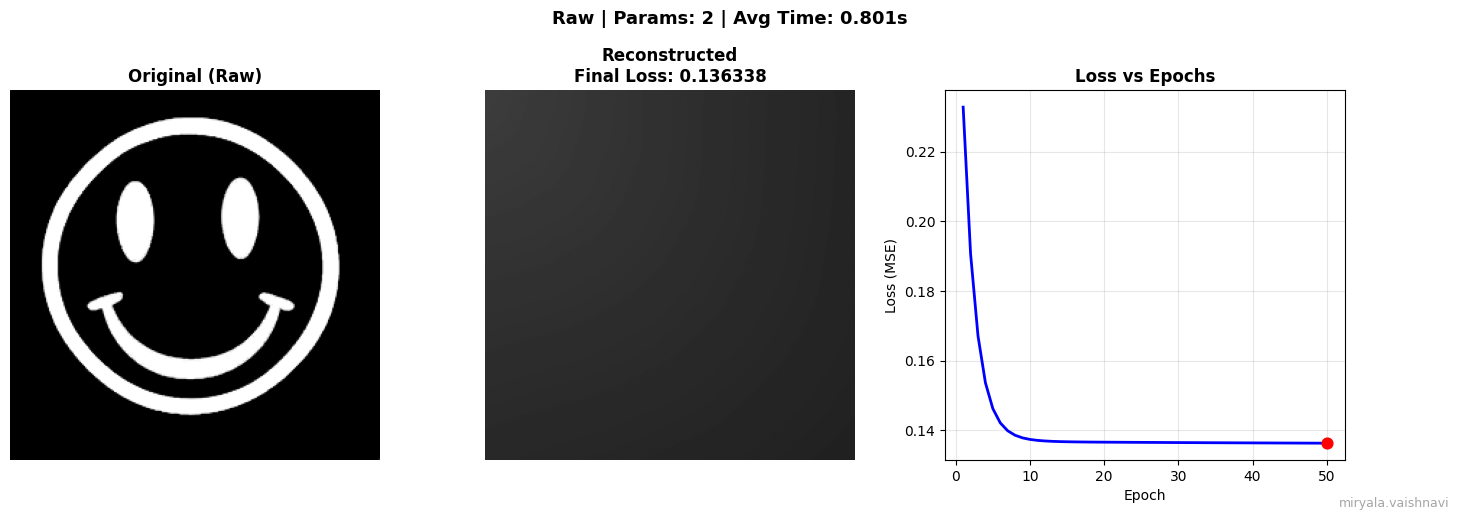

 Saved visualization for Raw: Raw_comparison_miryala.vaishnavi.png


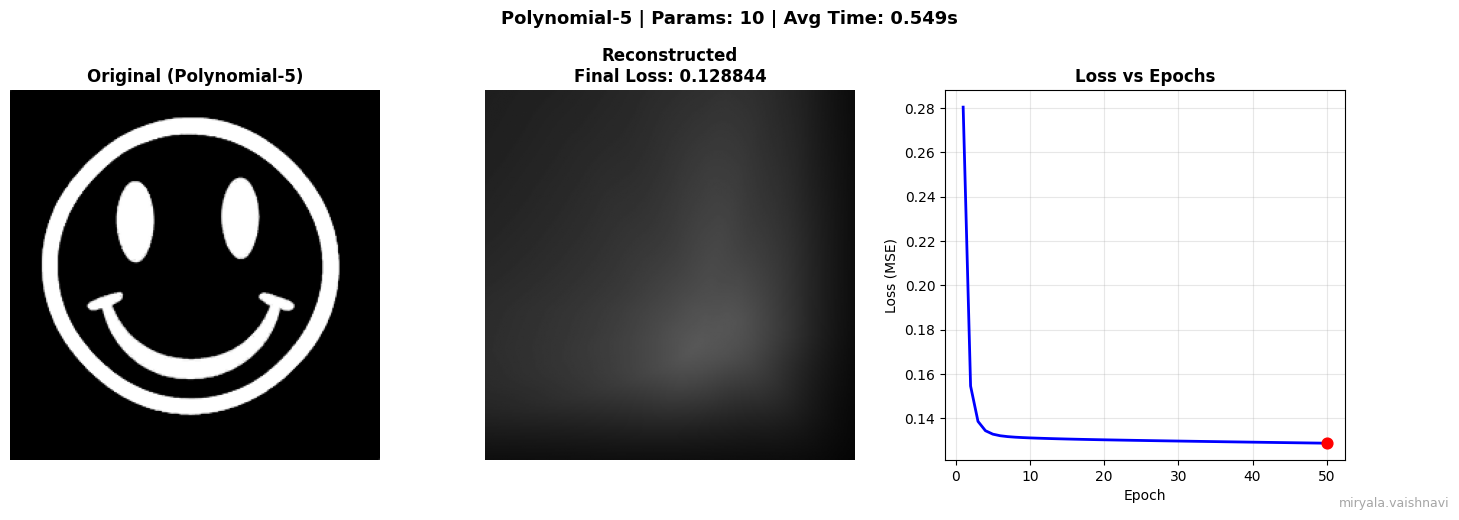

 Saved visualization for Polynomial-5: Polynomial-5_comparison_miryala.vaishnavi.png


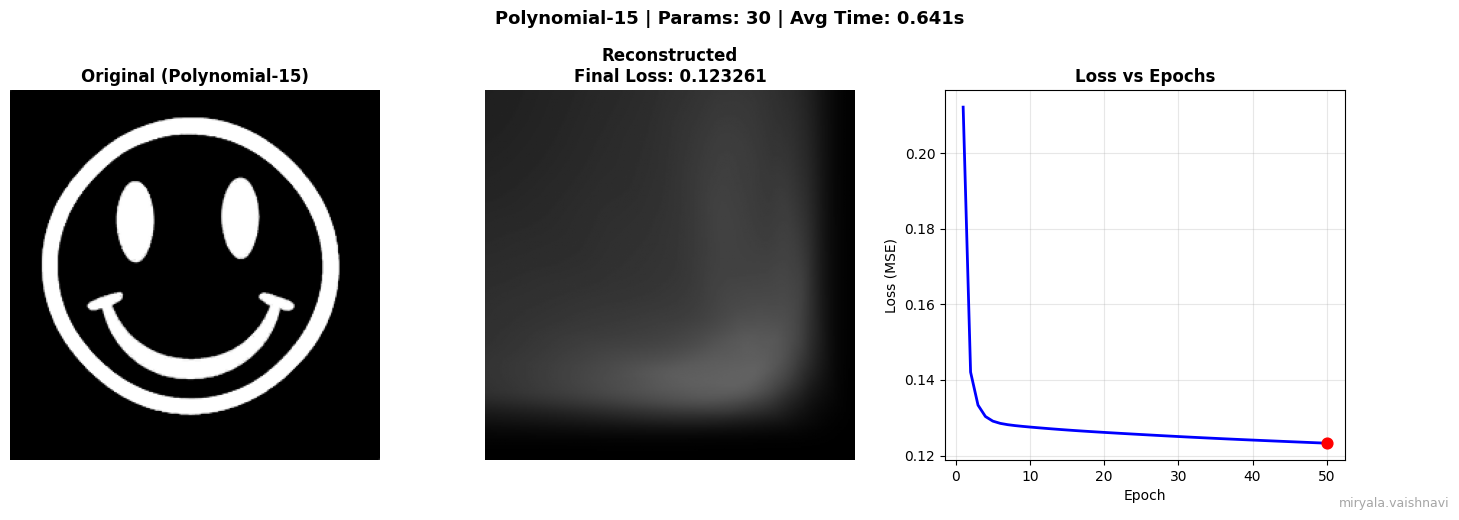

 Saved visualization for Polynomial-15: Polynomial-15_comparison_miryala.vaishnavi.png


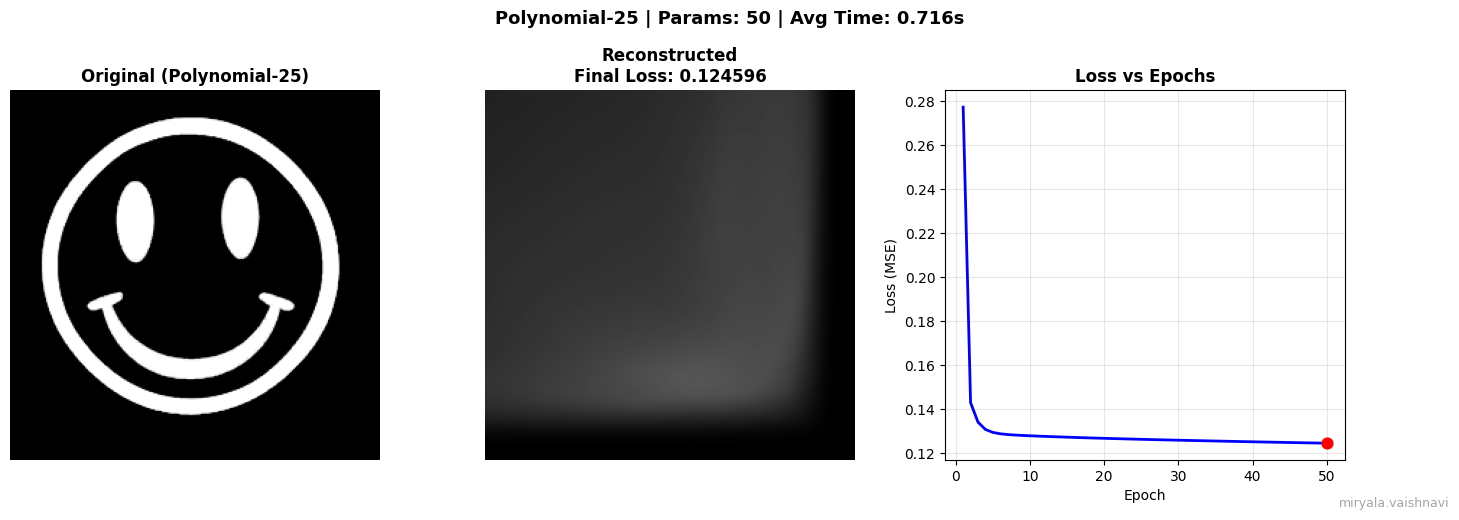

 Saved visualization for Polynomial-25: Polynomial-25_comparison_miryala.vaishnavi.png


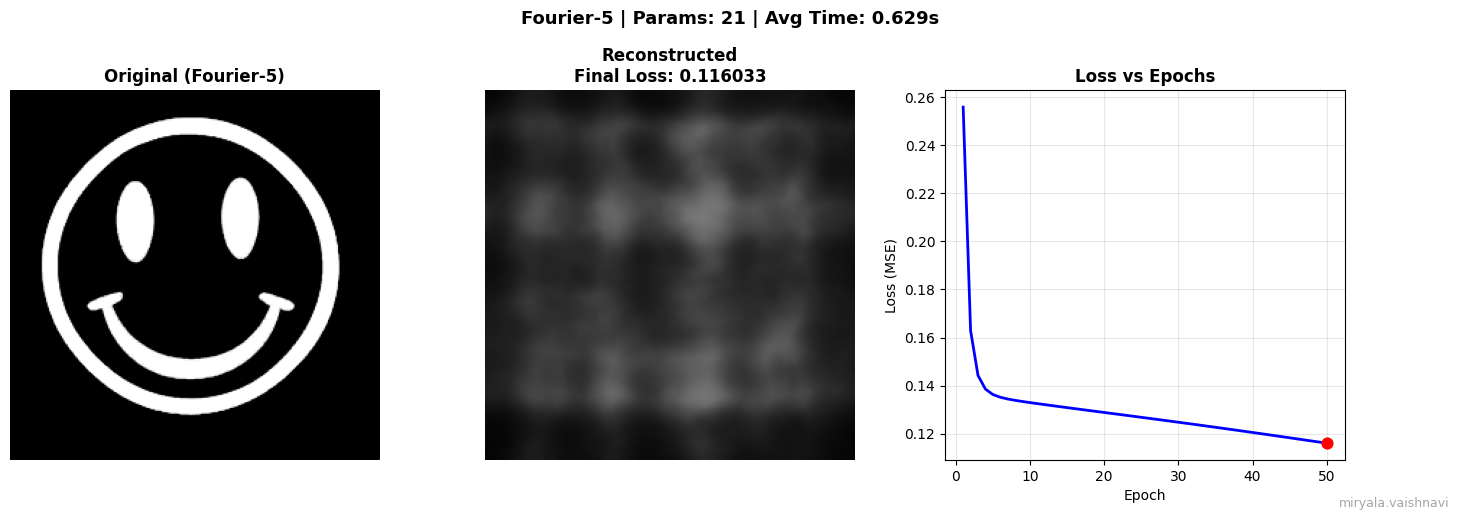

 Saved visualization for Fourier-5: Fourier-5_comparison_miryala.vaishnavi.png


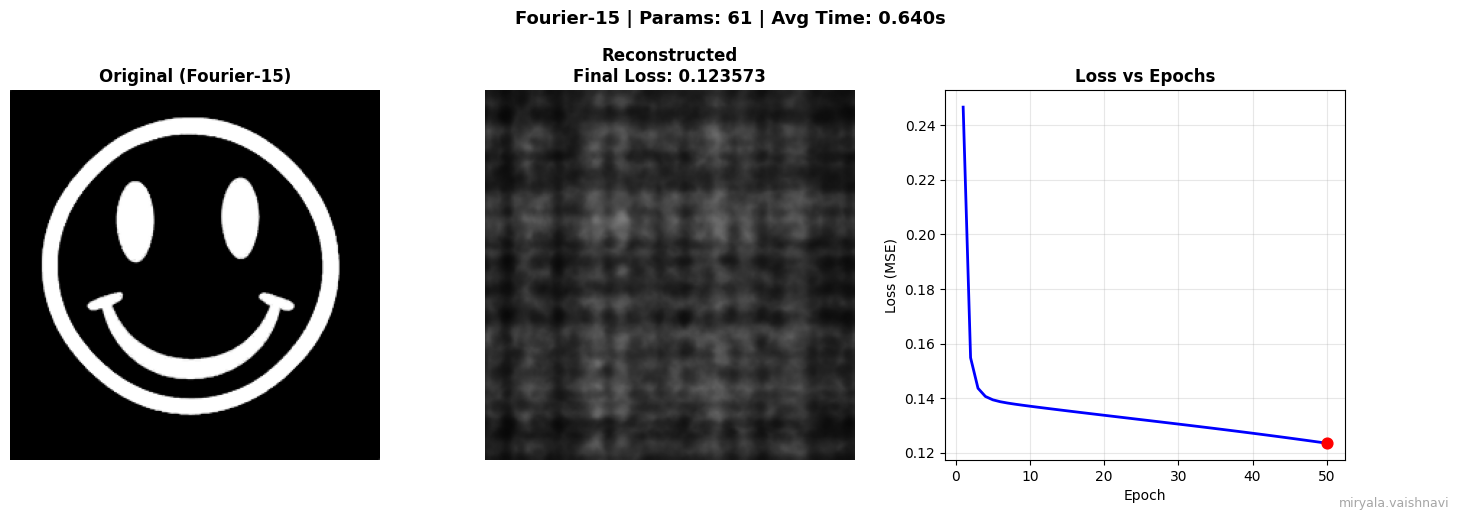

 Saved visualization for Fourier-15: Fourier-15_comparison_miryala.vaishnavi.png


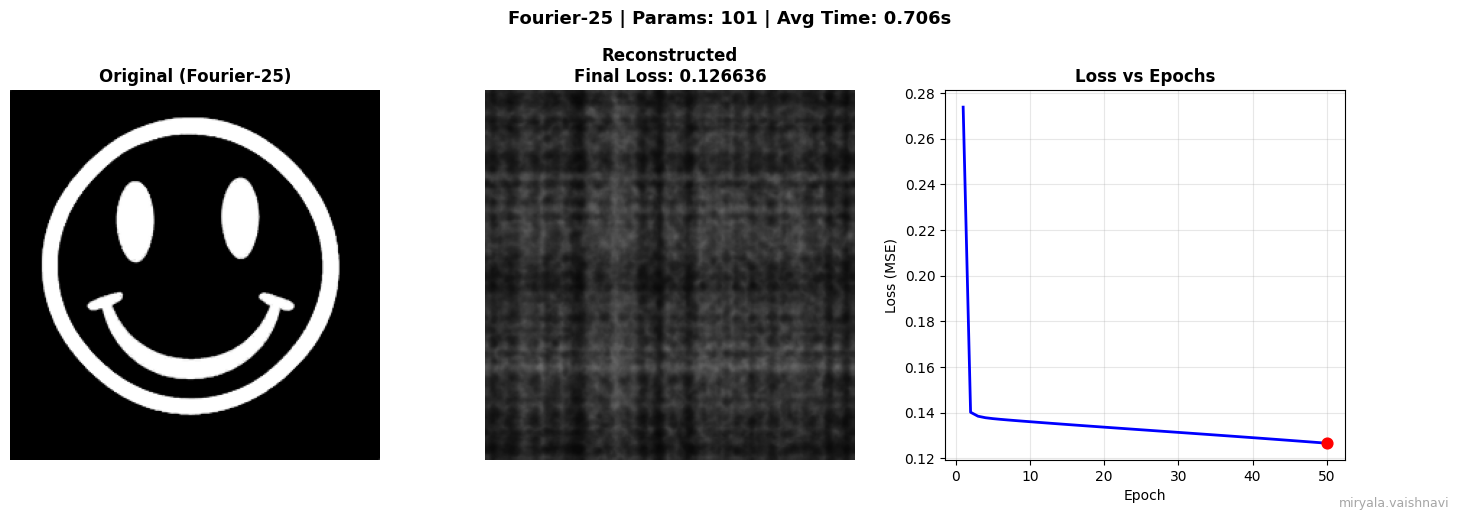

 Saved visualization for Fourier-25: Fourier-25_comparison_miryala.vaishnavi.png


In [ ]:
# Create GIF - pick one good combination from each
# Usually Polynomial-15 and Fourier-15 work well
create_comparison_gif(
    results_smiley,
    selected_methods=['Raw', 'Polynomial-15', 'Fourier-5'],
    gif_name=f'smiley_comparison_{email}.gif',
    email=email,
    fps=5
)


visualize_original_reconstructed_and_loss(results_smiley,email)

In [6]:
# ========== CAT IMAGE (150 epochs) ==========
print("\n\n" + "█"*80)
print("█" + " "*25 + "PROCESSING CAT.JPG (150 epochs)" + " "*22 + "█")
print("█"*80 + "\n")

results_cat = run_section_2_4(
    img_path="Q2-20251008T082436Z-1-001/Q2/cat.jpg",
    image_type="RGB",
    epochs=150,
    email=email
)

# Create table
create_results_table(results_cat, email)






████████████████████████████████████████████████████████████████████████████████
█                         PROCESSING CAT.JPG (150 epochs)                      █
████████████████████████████████████████████████████████████████████████████████


████████████████████████████████████████████████████████████████████████████████
█                              RAW FEATURES (BASELINE)                          █
████████████████████████████████████████████████████████████████████████████████
Linear layer created: 2 -> 64, activation: ReLU
Linear layer created: 64 -> 128, activation: ReLU
Linear layer created: 128 -> 128, activation: ReLU
Linear layer created: 128 -> 3, activation: Sigmoid
Model created with 4 layers:
  Layer 1: Linear(2 -> 64, ReLU)
  Layer 2: Linear(64 -> 128, ReLU)
  Layer 3: Linear(128 -> 128, ReLU)
  Layer 4: Linear(128 -> 3, Sigmoid)
Loss function: MSELoss
Learning rate: 0.01

Training: Raw
Input features: 2
Hidden layers: [64, 128, 128]
Output size: 3
Total samples: 65


Creating GIF with methods: ['Raw', 'Polynomial-15', 'Fourier-15']
  Generated frame 10/150
  Generated frame 20/150
  Generated frame 30/150
  Generated frame 40/150
  Generated frame 50/150
  Generated frame 60/150
  Generated frame 70/150
  Generated frame 80/150
  Generated frame 90/150
  Generated frame 100/150
  Generated frame 110/150
  Generated frame 120/150
  Generated frame 130/150
  Generated frame 140/150
  Generated frame 150/150

Saving GIF to: cat_comparison_miryala.vaishnavi.gif
GIF created successfully! (150 frames)


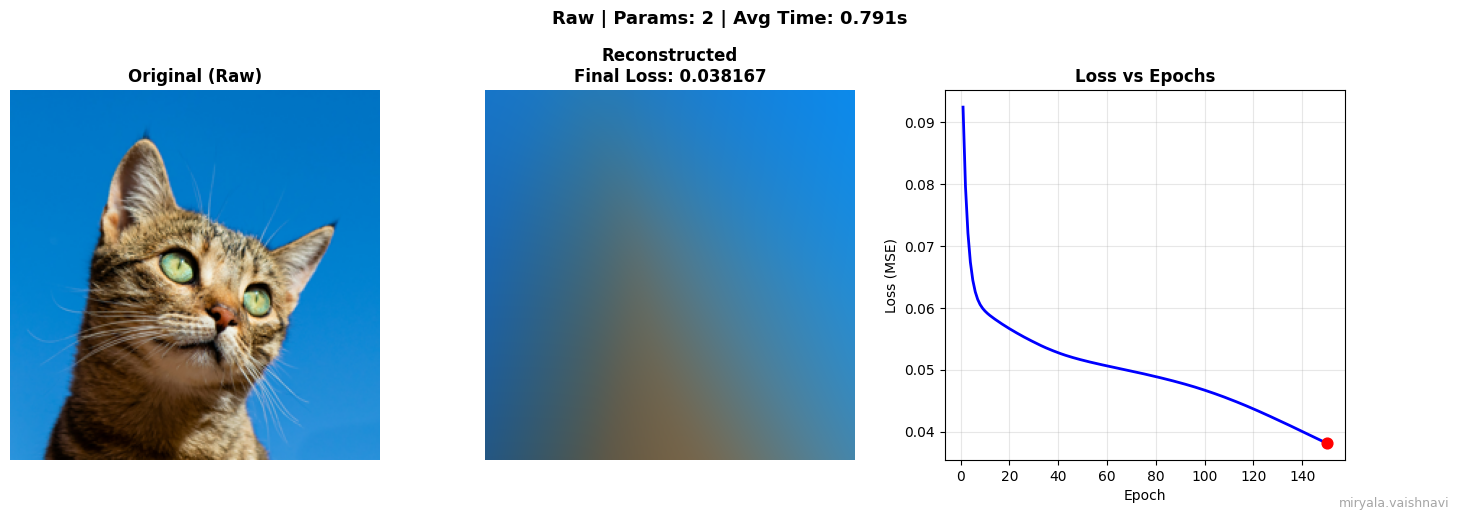

 Saved visualization for Raw: Raw_comparison_miryala.vaishnavi.png


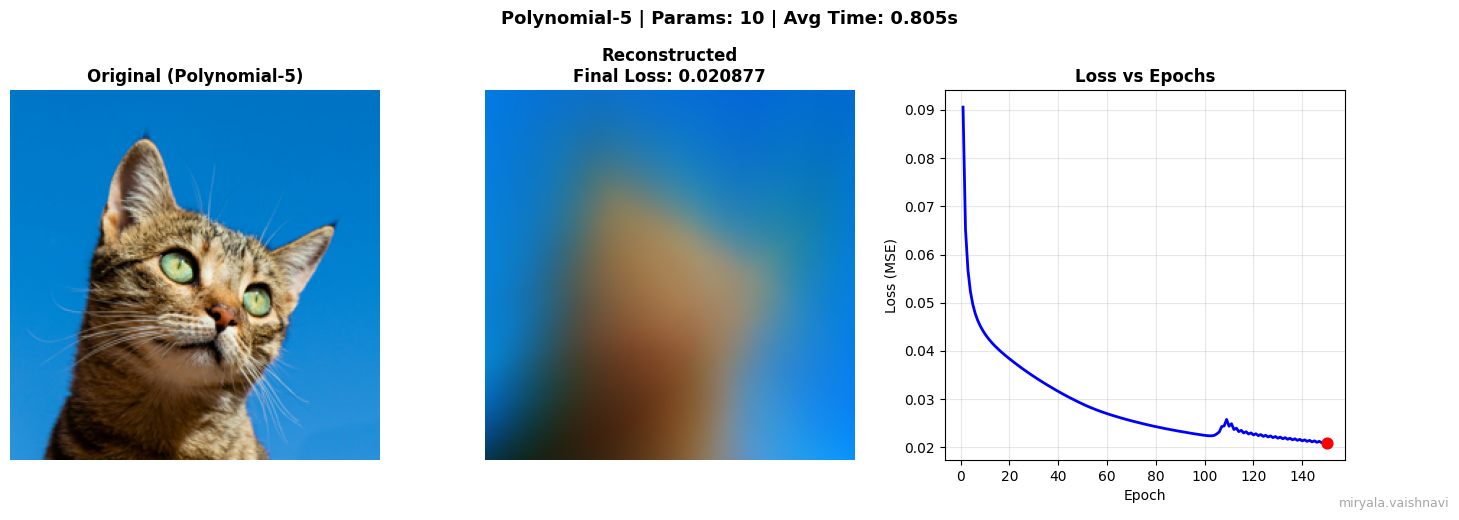

 Saved visualization for Polynomial-5: Polynomial-5_comparison_miryala.vaishnavi.png


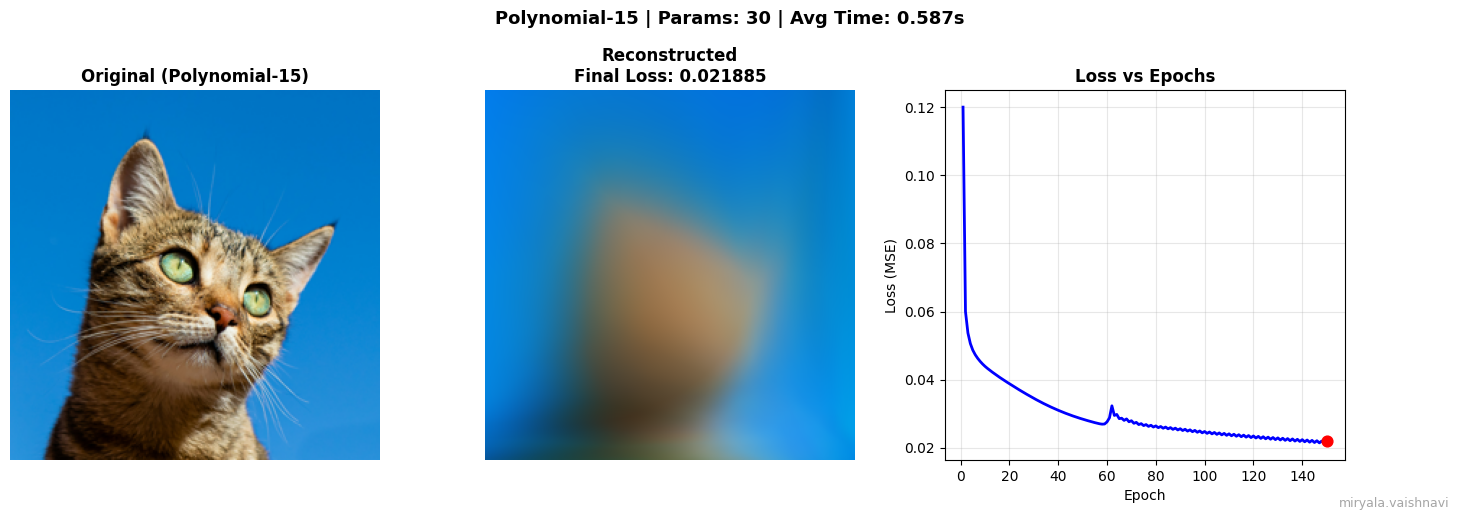

 Saved visualization for Polynomial-15: Polynomial-15_comparison_miryala.vaishnavi.png


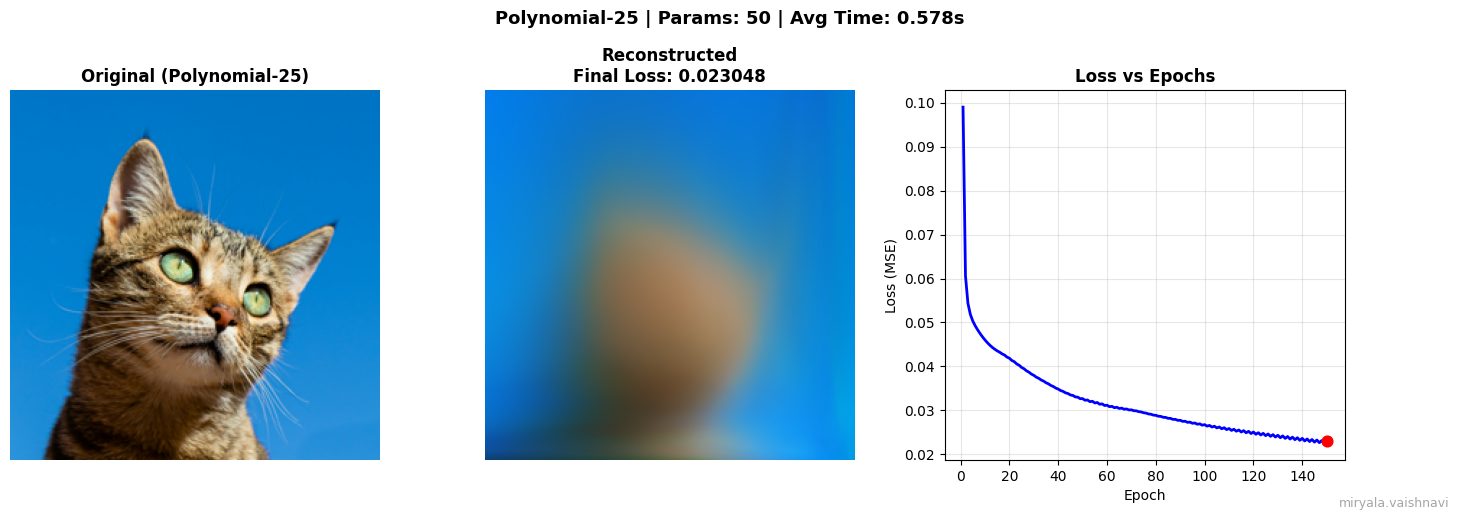

 Saved visualization for Polynomial-25: Polynomial-25_comparison_miryala.vaishnavi.png


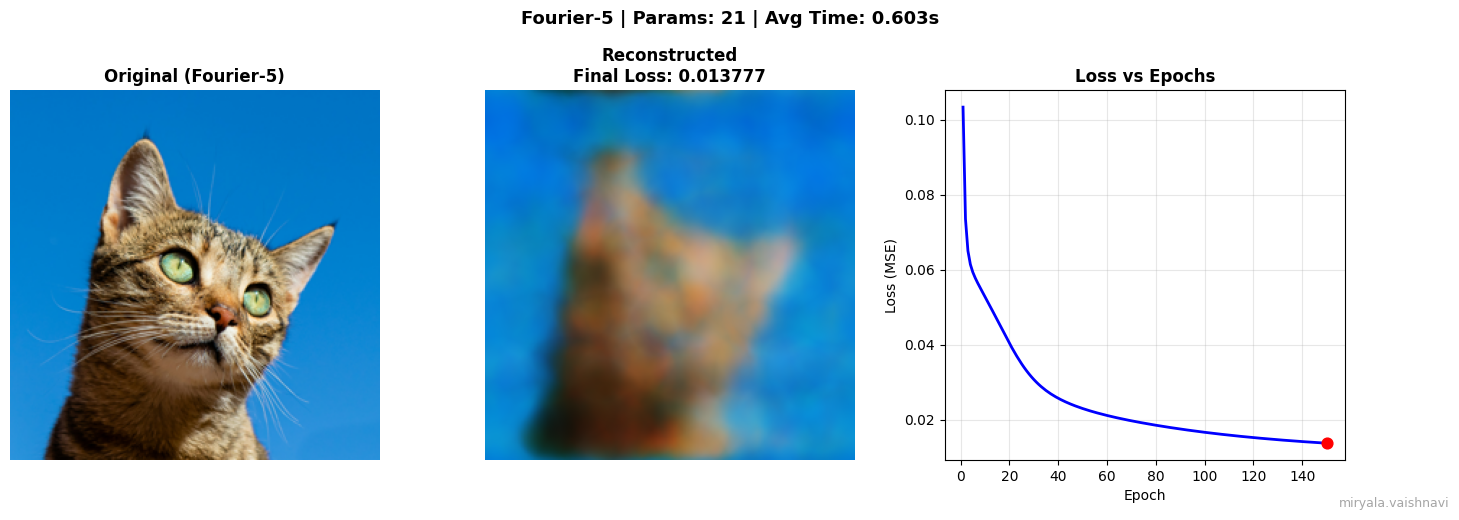

 Saved visualization for Fourier-5: Fourier-5_comparison_miryala.vaishnavi.png


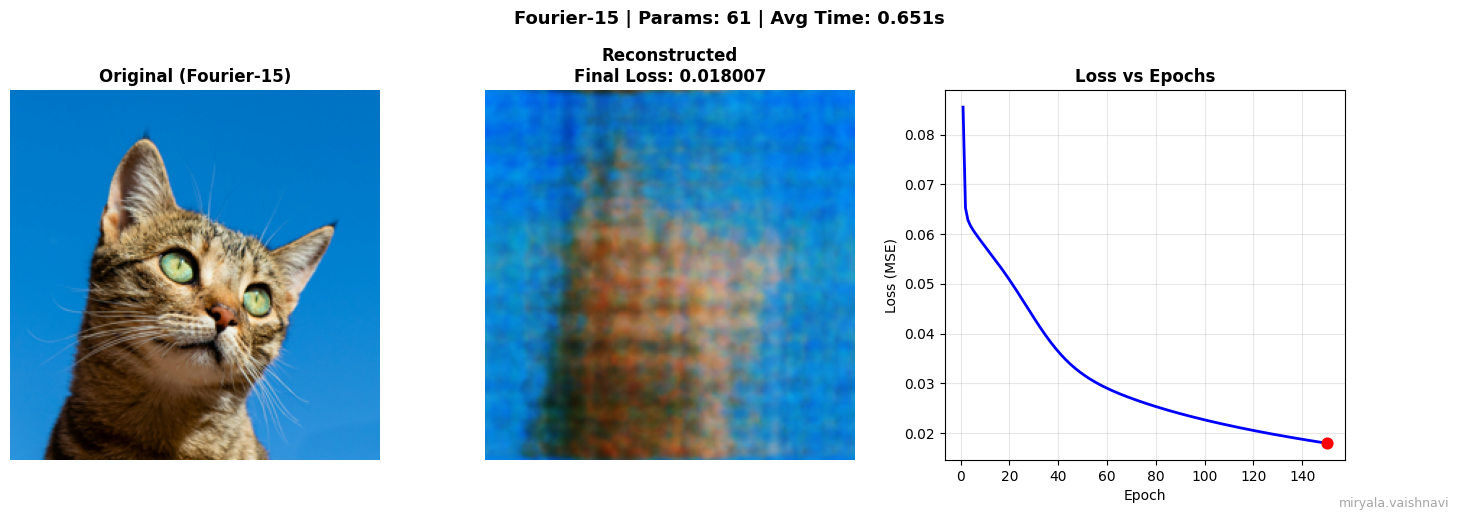

 Saved visualization for Fourier-15: Fourier-15_comparison_miryala.vaishnavi.png


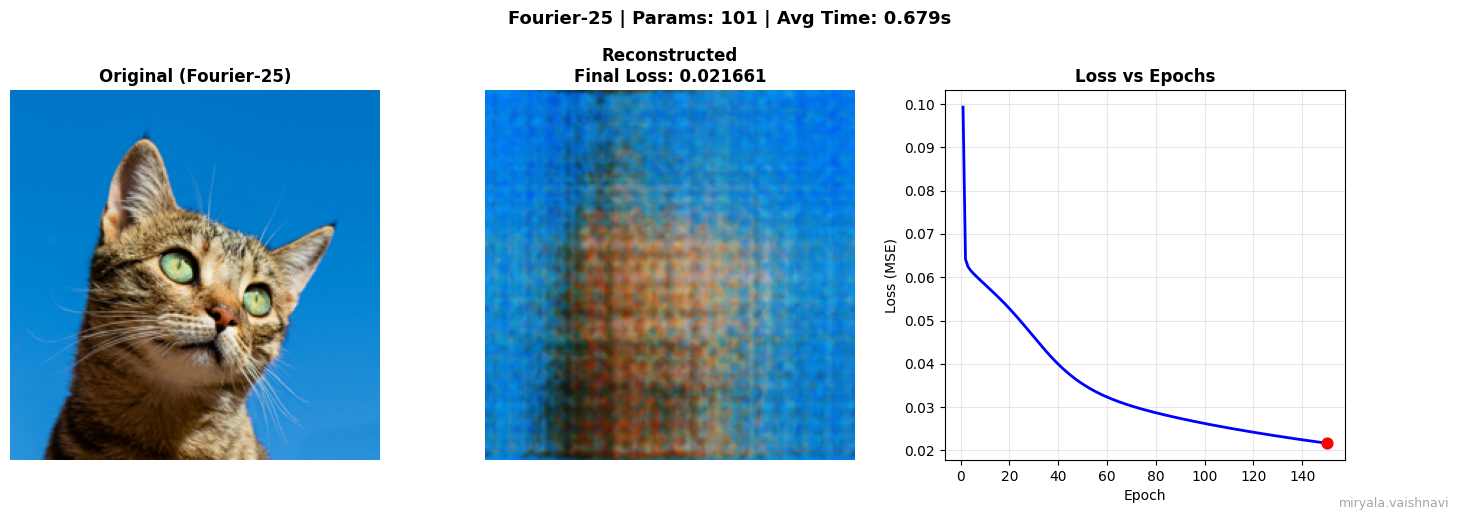

 Saved visualization for Fourier-25: Fourier-25_comparison_miryala.vaishnavi.png


In [ ]:
# Create GIF
create_comparison_gif(
    results_cat,
    selected_methods=['Raw', 'Polynomial-15', 'Fourier-15'],
    gif_name=f'cat_comparison_{email}.gif',
    email=email,
    fps=5
)


visualize_original_reconstructed_and_loss(results_cat,email)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
import os


# ============================================================================
# EARLY STOPPING IMPLEMENTATION
# ============================================================================

def train_with_early_stopping(features, targets, h, w, method_name,
                              hidden_sizes=[64, 128, 128],
                              max_epochs=100,
                              patience=10,
                              relative_loss_threshold=0.01,
                              learning_rate=0.01,
                              batch_size=1024):
    """
    Train MLP with early stopping based on relative loss improvement
    
    Early stopping criterion: Stop if L_t >= 0.99 * L_{t-10}
    i.e., loss hasn't improved by at least 1% over last 10 epochs
    
    Args:
        features: (N, D) input features
        targets: (N, C) target values
        h, w: image dimensions
        method_name: name for logging
        hidden_sizes: list of hidden layer sizes
        max_epochs: maximum number of epochs
        patience: number of epochs to look back (default 10)
        relative_loss_threshold: relative improvement threshold (default 0.01 for 1%)
        learning_rate: learning rate
        batch_size: batch size
    
    Returns:
        model: trained model
        final_loss: final loss value
        epochs_trained: actual number of epochs trained
        final_prediction: final reconstructed image
        losses: list of all losses
    """

    
    input_size = features.shape[1]
    output_size = targets.shape[1]
    
    # Build network
    layers = []
    prev_size = input_size
    
    for hidden_size in hidden_sizes:
        layers.append(Linear(prev_size, hidden_size, activation=ReLU()))
        prev_size = hidden_size
    
    layers.append(Linear(prev_size, output_size, activation=Sigmoid()))
    
    model = Model(layers, MSELoss(), learning_rate=learning_rate)
    
    # Training setup
    n_samples = features.shape[0]
    losses = []
    
    print(f"\n{'='*70}")
    print(f"Training: {method_name}")
    print(f"{'='*70}")
    print(f"Input features: {input_size}")
    print(f"Max epochs: {max_epochs}")
    print(f"Early stopping: patience={patience}, threshold={relative_loss_threshold*100}%")
    print(f"{'='*70}\n")
    
    start_time = time.time()
    
    for epoch in range(max_epochs):
        epoch_loss = 0
        n_batches = 0
        
        # Shuffle data
        indices = np.random.permutation(n_samples)
        
        # Mini-batch training
        for i in range(0, n_samples, batch_size):
            batch_indices = indices[i:i+batch_size]
            batch_features = features[batch_indices]
            batch_targets = targets[batch_indices]
            
            loss = model.train_step(batch_features, batch_targets)
            epoch_loss += loss
            n_batches += 1
        
        # Update weights
        model.update_weights()
        
        avg_loss = epoch_loss / n_batches
        losses.append(avg_loss)
        
        # Print progress
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch+1:3d}/{max_epochs} | Loss: {avg_loss:.8f}")
        
        # Early stopping check
        if epoch >= patience:
            current_loss = losses[-1]
            past_loss = losses[-patience-1]
            
            # Check if improvement is less than threshold
            # Stop if: L_t >= (1 - threshold) * L_{t-patience}
            # Equivalently: L_t >= 0.99 * L_{t-10} for 1% threshold
            improvement_ratio = past_loss - current_loss
            relative_improvement = improvement_ratio / past_loss if past_loss > 0 else 0
            
            if current_loss >= (1 - relative_loss_threshold) * past_loss:
                print(f"\nEarly stopping triggered at epoch {epoch+1}")
                print(f"Current loss: {current_loss:.8f}")
                print(f"Loss {patience} epochs ago: {past_loss:.8f}")
                print(f"Relative improvement: {relative_improvement*100:.2f}% < {relative_loss_threshold*100}%")
                break
    
    total_time = time.time() - start_time
    epochs_trained = len(losses)
    final_loss = losses[-1]
    
    print(f"\n{'='*70}")
    print(f"Training Complete!")
    print(f"Epochs trained: {epochs_trained}/{max_epochs}")
    print(f"Final loss: {final_loss:.8f}")
    print(f"Total time: {total_time:.2f}s")
    print(f"Average time per epoch: {total_time/epochs_trained:.3f}s")
    print(f"{'='*70}\n")
    
    # Final prediction
    final_prediction = model.predict(features)
    final_image = final_prediction.reshape(h, w, -1)
    
    return model, final_loss, epochs_trained, final_image, losses


# ============================================================================
# SECTION 2.5: BLURRED IMAGE RECONSTRUCTION
# ============================================================================

def run_blurred_experiment(blur_dir, image_type="RGB", 
                           max_epochs=100, patience=10,
                           relative_loss_threshold=0.01,
                           email="miryala.vaishnavi"):
    """
    Run experiment on all blurred images (blur levels 0-10)
    
    Args:
        blur_dir: directory containing blur_0.jpg, blur_1.jpg, ..., blur_10.jpg
        image_type: "RGB" or "Gray"
        max_epochs: maximum training epochs
        patience: early stopping patience
        relative_loss_threshold: early stopping threshold (0.01 = 1%)
        email: email for watermark
    
    Returns:
        results_base: list of results for BASE method
        results_fourier: list of results for FOURIER method
    """
    
    results_base = []
    results_fourier = []
    
    print("\n" + "█"*80)
    print("█" + " "*20 + "SECTION 2.5: BLURRED IMAGE RECONSTRUCTION" + " "*18 + "█")
    print("█"*80 + "\n")
    
    # Process each blur level
    for blur_level in range(11):
        img_path = os.path.join(blur_dir, f"blur_{blur_level}.png")
        
        if not os.path.exists(img_path):
            print(f"  Warning: {img_path} not found, skipping...")
            continue
        
        print("\n" + "="*80)
        print(f"PROCESSING BLUR LEVEL σ = {blur_level}")
        print("="*80)
        
        # ========== BASE METHOD (Raw features) ==========
        print("\n" + "-"*80)
        print("BASE METHOD (Raw Coordinates)")
        print("-"*80)
        
        features_base, targets, img_array, h, w = Modular_Dataloader(
            img_path, image_type, "Raw"
        )
        
        model_base, loss_base, epochs_base, img_base, losses_base = train_with_early_stopping(
            features_base, targets, h, w, 
            f"BASE (blur σ={blur_level})",
            max_epochs=max_epochs,
            patience=patience,
            relative_loss_threshold=relative_loss_threshold,
            learning_rate=0.01
        )
        
        results_base.append({
            'blur_level': blur_level,
            'final_loss': loss_base,
            'epochs': epochs_base,
            'predictions': img_base,
            'losses': losses_base,
            'original': img_array,
            'h': h,
            'w': w
        })
        
        # ========== FOURIER METHOD (k=5) ==========
        print("\n" + "-"*80)
        print("FOURIER METHOD (k=5 frequencies)")
        print("-"*80)
        
        features_fourier, targets, img_array, h, w = Modular_Dataloader(
            img_path, image_type, "Fourier", freq=5
        )
        
        model_fourier, loss_fourier, epochs_fourier, img_fourier, losses_fourier = train_with_early_stopping(
            features_fourier, targets, h, w, 
            f"FOURIER (blur σ={blur_level})",
            max_epochs=max_epochs,
            patience=patience,
            relative_loss_threshold=relative_loss_threshold,
            learning_rate=0.01
        )
        
        results_fourier.append({
            'blur_level': blur_level,
            'final_loss': loss_fourier,
            'epochs': epochs_fourier,
            'predictions': img_fourier,
            'losses': losses_fourier,
            'original': img_array,
            'h': h,
            'w': w
        })
        
        print(f"\n{'='*80}")
        print(f"SUMMARY FOR BLUR LEVEL σ = {blur_level}")
        print(f"{'='*80}")
        print(f"BASE:    Loss = {loss_base:.8f}, Epochs = {epochs_base}")
        print(f"FOURIER: Loss = {loss_fourier:.8f}, Epochs = {epochs_fourier}")
        improvement = ((loss_base - loss_fourier) / loss_base) * 100
        print(f"Improvement: {improvement:.2f}%")
        print(f"{'='*80}\n")
    
    return results_base, results_fourier


# ============================================================================
# ANALYSIS AND VISUALIZATION
# ============================================================================

def plot_loss_comparison(results_base, results_fourier, email="miryala.vaishnavi"):
    """
    Plot reconstruction loss vs blur level (linear and log scale)
    """
    blur_levels = [r['blur_level'] for r in results_base]
    losses_base = [r['final_loss'] for r in results_base]
    losses_fourier = [r['final_loss'] for r in results_fourier]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # ========== LINEAR SCALE ==========
    axes[0].plot(blur_levels, losses_base, 'o-', label='BASE (Raw)', 
                linewidth=3, markersize=10, color='#e74c3c')
    axes[0].plot(blur_levels, losses_fourier, 's-', label='FOURIER (k=5)', 
                linewidth=3, markersize=10, color='#3498db')
    axes[0].set_xlabel('Blur Level (σ)', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Reconstruction Loss (MSE)', fontsize=14, fontweight='bold')
    axes[0].set_title('Reconstruction Loss vs Blur Level', fontsize=16, fontweight='bold')
    axes[0].legend(fontsize=12, loc='best')
    axes[0].grid(True, alpha=0.3, linestyle='--')
    axes[0].tick_params(labelsize=11)
    
    # ========== LOGARITHMIC SCALE ==========
    axes[1].plot(blur_levels, losses_base, 'o-', label='BASE (Raw)', 
                linewidth=3, markersize=10, color='#e74c3c')
    axes[1].plot(blur_levels, losses_fourier, 's-', label='FOURIER (k=5)', 
                linewidth=3, markersize=10, color='#3498db')
    axes[1].set_xlabel('Blur Level (σ)', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Reconstruction Loss (MSE) - Log Scale', fontsize=14, fontweight='bold')
    axes[1].set_title('Reconstruction Loss vs Blur Level (Logarithmic)', fontsize=16, fontweight='bold')
    axes[1].set_yscale('log')
    axes[1].legend(fontsize=12, loc='best')
    axes[1].grid(True, alpha=0.3, linestyle='--', which='both')
    axes[1].tick_params(labelsize=11)
    
    # Add email watermark
    plt.text(0.98, 0.02, email, ha='right', va='bottom',
            transform=fig.transFigure, fontsize=11, color='gray', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig(f'blur_loss_comparison_{email}.png', dpi=200, bbox_inches='tight')
    plt.show()
    
    print(f"\n✓ Loss comparison plot saved: blur_loss_comparison_{email}.png")


def visualize_reconstructions(results_base, results_fourier, 
                             blur_levels_to_show=[0, 2, 5, 8, 9],
                             email="miryala.vaishnavi"):
    """
    Visualize original and reconstructions for selected blur levels
    """
    n_levels = len(blur_levels_to_show)
    fig, axes = plt.subplots(3, n_levels, figsize=(4*n_levels, 12))
    
    for col, blur_level in enumerate(blur_levels_to_show):
        # Find results for this blur level
        res_base = [r for r in results_base if r['blur_level'] == blur_level][0]
        res_fourier = [r for r in results_fourier if r['blur_level'] == blur_level][0]
        
        # Row 0: Original (blurred) image
        axes[0, col].imshow(res_base['original'].squeeze(), 
                          cmap='gray' if res_base['original'].shape[-1] == 1 else None)
        axes[0, col].set_title(f'Original\nBlur σ={blur_level}', fontsize=12, fontweight='bold')
        axes[0, col].axis('off')
        
        # Row 1: BASE reconstruction
        axes[1, col].imshow(res_base['predictions'].squeeze(), 
                          cmap='gray' if res_base['predictions'].shape[-1] == 1 else None)
        axes[1, col].set_title(f'BASE\nLoss: {res_base["final_loss"]:.6f}\nEpochs: {res_base["epochs"]}', 
                             fontsize=11)
        axes[1, col].axis('off')
        
        # Row 2: FOURIER reconstruction
        axes[2, col].imshow(res_fourier['predictions'].squeeze(), 
                          cmap='gray' if res_fourier['predictions'].shape[-1] == 1 else None)
        axes[2, col].set_title(f'FOURIER (k=5)\nLoss: {res_fourier["final_loss"]:.6f}\nEpochs: {res_fourier["epochs"]}', 
                             fontsize=11)
        axes[2, col].axis('off')
    
    # Add row labels
    fig.text(0.02, 0.83, 'Original', va='center', rotation='vertical', 
            fontsize=14, fontweight='bold')
    fig.text(0.02, 0.50, 'BASE', va='center', rotation='vertical', 
            fontsize=14, fontweight='bold')
    fig.text(0.02, 0.17, 'FOURIER', va='center', rotation='vertical', 
            fontsize=14, fontweight='bold')
    
    # Email watermark
    plt.text(0.98, 0.02, email, ha='right', va='bottom',
            transform=fig.transFigure, fontsize=11, color='gray', alpha=0.7)
    
    plt.suptitle('Image Reconstruction Comparison Across Blur Levels', 
                fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout(rect=[0.03, 0, 1, 0.99])
    plt.savefig(f'blur_reconstructions_{email}.png', dpi=200, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Reconstruction comparison saved: blur_reconstructions_{email}.png")


def create_summary_table(results_base, results_fourier, email="miryala.vaishnavi"):
    """
    Create detailed summary table
    """
    print("\n" + "="*100)
    print(" "*35 + "DETAILED RESULTS SUMMARY")
    print("="*100)
    print(f"{'Blur σ':<10} {'BASE Loss':<18} {'BASE Epochs':<15} {'FOURIER Loss':<18} {'FOURIER Epochs':<15} {'Improvement':<12}")
    print("-"*100)
    
    for res_b, res_f in zip(results_base, results_fourier):
        blur = res_b['blur_level']
        loss_b = res_b['final_loss']
        epochs_b = res_b['epochs']
        loss_f = res_f['final_loss']
        epochs_f = res_f['epochs']
        improvement = ((loss_b - loss_f) / loss_b) * 100
        
        print(f"{blur:<10} {loss_b:<18.8f} {epochs_b:<15} {loss_f:<18.8f} {epochs_f:<15} {improvement:>10.2f}%")
    
    print("="*100)
    
    # Save to file
    with open(f'blur_results_table_{email}.txt', 'w') as f:
        f.write("="*100 + "\n")
        f.write(" "*35 + "DETAILED RESULTS SUMMARY\n")
        f.write("="*100 + "\n")
        f.write(f"{'Blur σ':<10} {'BASE Loss':<18} {'BASE Epochs':<15} {'FOURIER Loss':<18} {'FOURIER Epochs':<15} {'Improvement':<12}\n")
        f.write("-"*100 + "\n")
        
        for res_b, res_f in zip(results_base, results_fourier):
            blur = res_b['blur_level']
            loss_b = res_b['final_loss']
            epochs_b = res_b['epochs']
            loss_f = res_f['final_loss']
            epochs_f = res_f['epochs']
            improvement = ((loss_b - loss_f) / loss_b) * 100
            
            f.write(f"{blur:<10} {loss_b:<18.8f} {epochs_b:<15} {loss_f:<18.8f} {epochs_f:<15} {improvement:>10.2f}%\n")
        
        f.write("="*100 + "\n")
    
    print(f"\n✓ Summary table saved: blur_results_table_{email}.txt")


# ============================================================================
#  ANALYSIS
# ============================================================================

def analyze(results_base, results_fourier):
    """
    Detailed analysis and discussion of results
    """
    print("\n" + "█"*80)
    print("█" + " "*25 + "ANALYSIS" + " "*31 + "█")
    print("█"*80 + "\n")
    
    blur_levels = [r['blur_level'] for r in results_base]
    losses_base = [r['final_loss'] for r in results_base]
    losses_fourier = [r['final_loss'] for r in results_fourier]
    
    print("="*80)
    print("1. OBSERVED BEHAVIOR")
    print("="*80)
    
    # Calculate trends
    low_blur_improvement = np.mean([
        ((losses_base[i] - losses_fourier[i]) / losses_base[i]) * 100 
        for i in range(min(4, len(blur_levels)))
    ])
    
    high_blur_improvement = np.mean([
        ((losses_base[i] - losses_fourier[i]) / losses_base[i]) * 100 
        for i in range(max(0, len(blur_levels)-4), len(blur_levels))
    ])
    
    print(f"\n Low Blur (σ=0-3):")
    print(f"   Average FOURIER improvement over BASE: {low_blur_improvement:.2f}%")
    print(f"   → Fourier features provide SIGNIFICANT advantage")
    
    print(f"\n High Blur (σ=7-10):")
    print(f"   Average FOURIER improvement over BASE: {high_blur_improvement:.2f}%")
    print(f"   → Fourier advantage DIMINISHES but still present")
    

    
    

In [16]:
blur_dir = "Q2-20251008T082436Z-1-001/Q2/blurred"
    
# Run experiment
results_base, results_fourier = run_blurred_experiment(
    blur_dir=blur_dir,
    image_type="RGB",
    max_epochs=100,
    patience=10,
    relative_loss_threshold=0.01,  # 1% threshold
    email=email
)


████████████████████████████████████████████████████████████████████████████████
█                    SECTION 2.5: BLURRED IMAGE RECONSTRUCTION                  █
████████████████████████████████████████████████████████████████████████████████


PROCESSING BLUR LEVEL σ = 0

--------------------------------------------------------------------------------
BASE METHOD (Raw Coordinates)
--------------------------------------------------------------------------------
Linear layer created: 2 -> 64, activation: ReLU
Linear layer created: 64 -> 128, activation: ReLU
Linear layer created: 128 -> 128, activation: ReLU
Linear layer created: 128 -> 3, activation: Sigmoid
Model created with 4 layers:
  Layer 1: Linear(2 -> 64, ReLU)
  Layer 2: Linear(64 -> 128, ReLU)
  Layer 3: Linear(128 -> 128, ReLU)
  Layer 4: Linear(128 -> 3, Sigmoid)
Loss function: MSELoss
Learning rate: 0.01

Training: BASE (blur σ=0)
Input features: 2
Max epochs: 100
Early stopping: patience=10, threshold=1.0%

Epoch   1/10


                                   DETAILED RESULTS SUMMARY
Blur σ     BASE Loss          BASE Epochs     FOURIER Loss       FOURIER Epochs  Improvement 
----------------------------------------------------------------------------------------------------
0          0.04583137         100             0.01647359         100                  64.06%
1          0.04467061         100             0.01382538         100                  69.05%
2          0.04185081         100             0.01063683         100                  74.58%
3          0.03775512         100             0.00908585         100                  75.93%
4          0.03536099         100             0.00748151         100                  78.84%
5          0.03381905         100             0.00637481         100                  81.15%
6          0.03240682         100             0.00714933         100                  77.94%
7          0.03073408         100             0.00579675         100                  81.14%


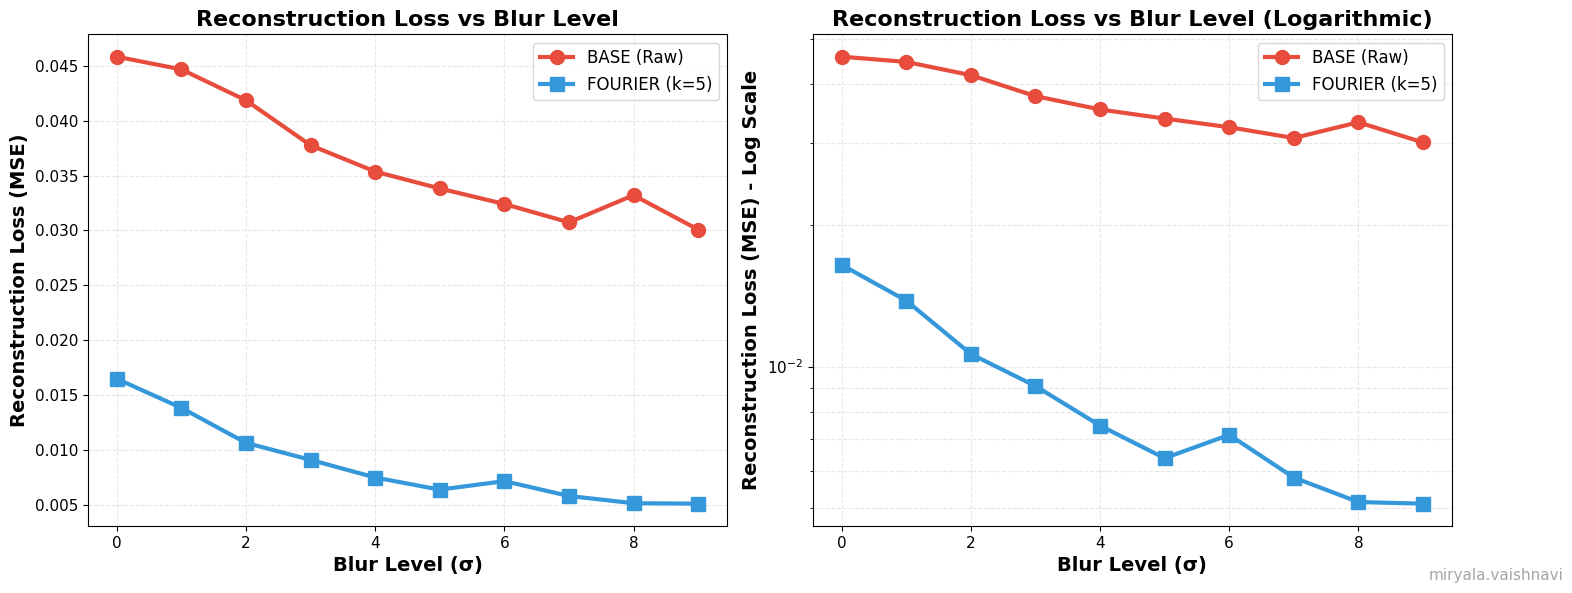


✓ Loss comparison plot saved: blur_loss_comparison_miryala.vaishnavi.png


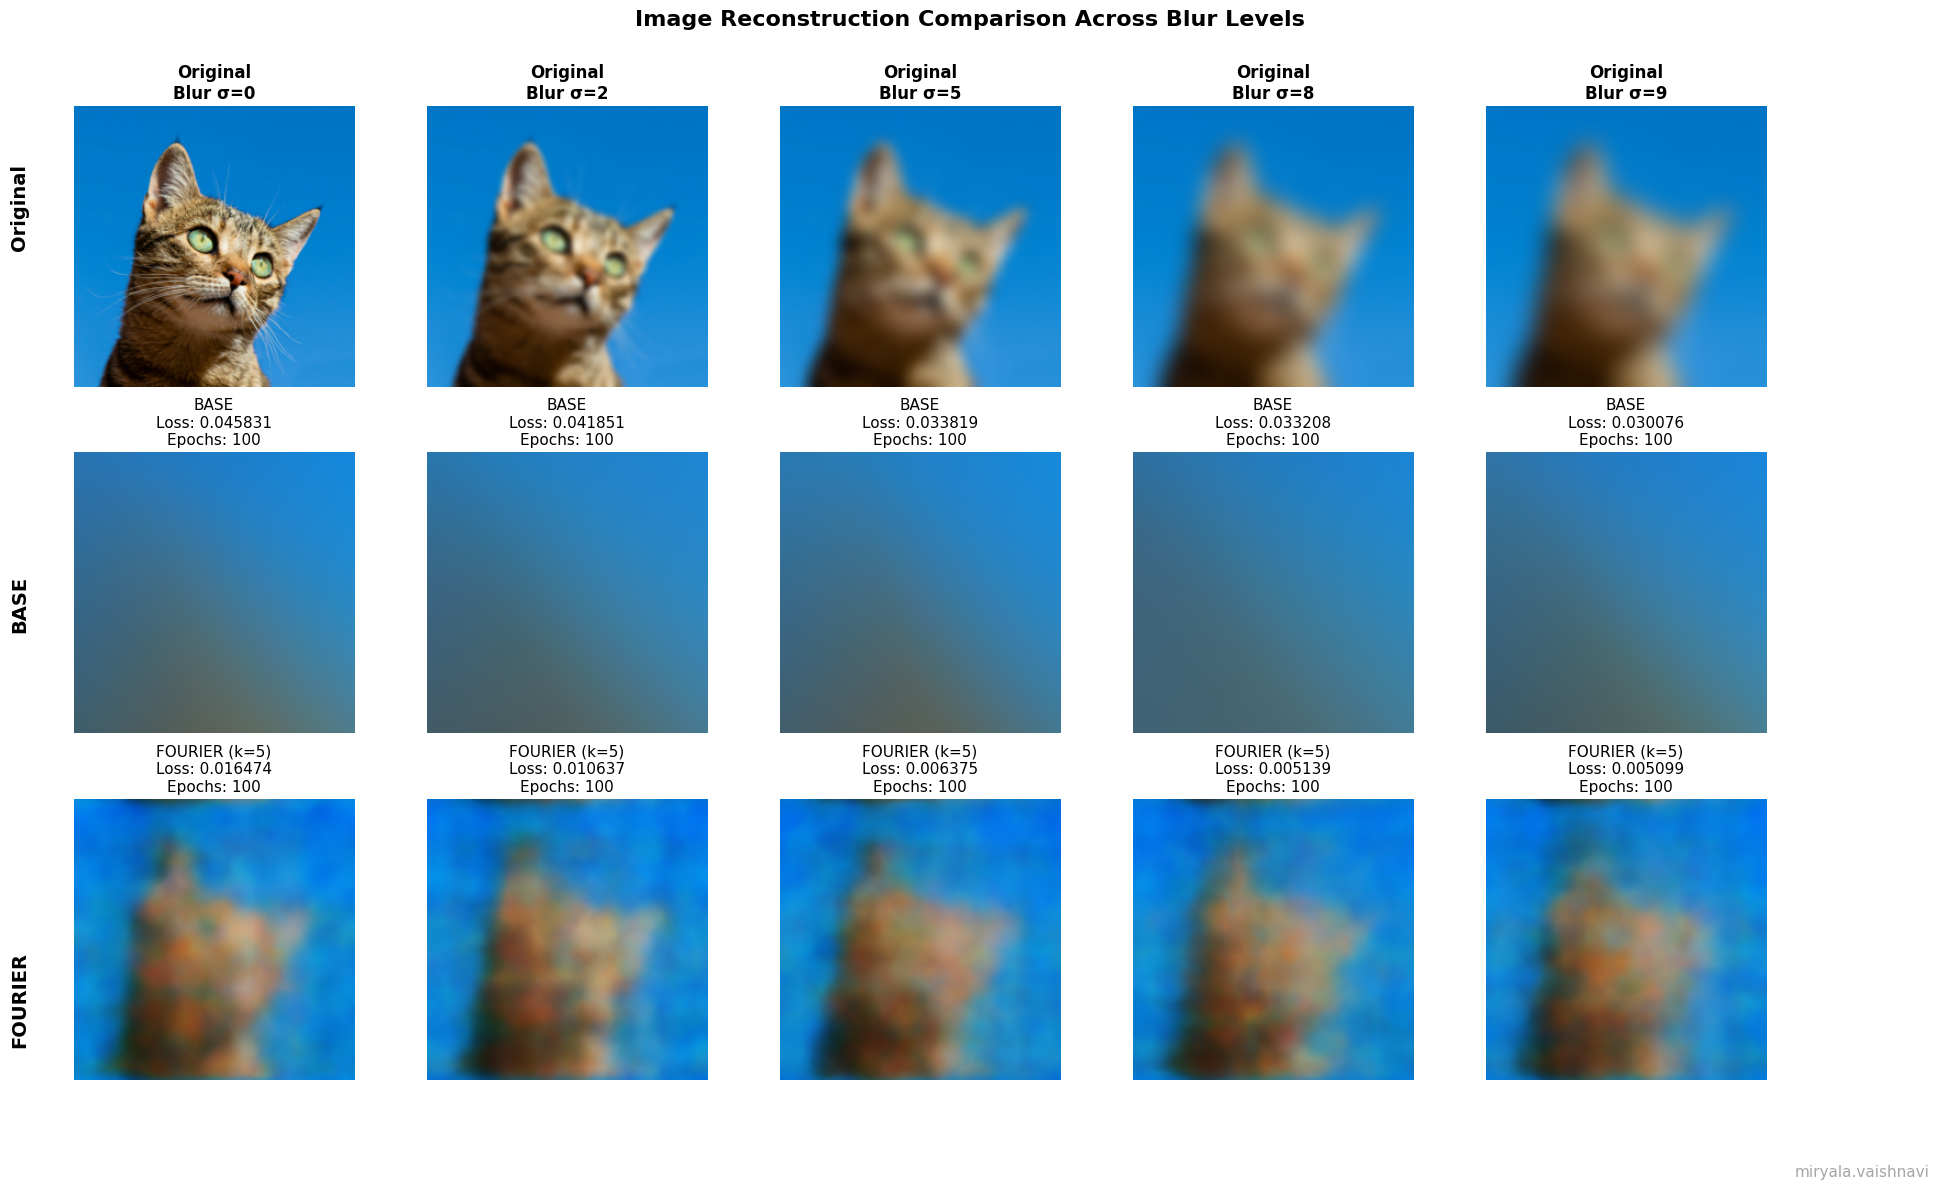

✓ Reconstruction comparison saved: blur_reconstructions_miryala.vaishnavi.png

████████████████████████████████████████████████████████████████████████████████
█                         ANALYSIS                               █
████████████████████████████████████████████████████████████████████████████████

1. OBSERVED BEHAVIOR

 Low Blur (σ=0-3):
   Average FOURIER improvement over BASE: 70.91%
   → Fourier features provide SIGNIFICANT advantage

 High Blur (σ=7-10):
   Average FOURIER improvement over BASE: 81.66%
   → Fourier advantage DIMINISHES but still present


In [20]:
# Create visualizations and analysis
create_summary_table(results_base, results_fourier, email)
plot_loss_comparison(results_base, results_fourier, email)
visualize_reconstructions(results_base, results_fourier, 
                             blur_levels_to_show=[0, 2, 5, 8, 9], 
                            email=email)
analyze(results_base, results_fourier)

In [21]:
def create_summary_table_V2(results_base, results_fourier, email="miryala.vaishnavi"):
    """
    Create detailed summary table (shows gap instead of improvement percentage)
    """
    print("\n" + "="*100)
    print(" "*35 + "DETAILED RESULTS SUMMARY")
    print("="*100)
    print(f"{'Blur σ':<10} {'BASE Loss':<18} {'BASE Epochs':<15} {'FOURIER Loss':<18} {'FOURIER Epochs':<15} {'Gap':<12}")
    print("-"*100)
    
    for res_b, res_f in zip(results_base, results_fourier):
        blur = res_b['blur_level']
        loss_b = res_b['final_loss']
        epochs_b = res_b['epochs']
        loss_f = res_f['final_loss']
        epochs_f = res_f['epochs']
        gap = loss_b - loss_f  # difference, not percentage
        
        print(f"{blur:<10} {loss_b:<18.8f} {epochs_b:<15} {loss_f:<18.8f} {epochs_f:<15} {gap:>10.8f}")
    
    print("="*100)
    
    # Save to file
    with open(f'blur_results_table_{email}.txt', 'w') as f:
        f.write("="*100 + "\n")
        f.write(" "*35 + "DETAILED RESULTS SUMMARY\n")
        f.write("="*100 + "\n")
        f.write(f"{'Blur σ':<10} {'BASE Loss':<18} {'BASE Epochs':<15} {'FOURIER Loss':<18} {'FOURIER Epochs':<15} {'Gap':<12}\n")
        f.write("-"*100 + "\n")
        
        for res_b, res_f in zip(results_base, results_fourier):
            blur = res_b['blur_level']
            loss_b = res_b['final_loss']
            epochs_b = res_b['epochs']
            loss_f = res_f['final_loss']
            epochs_f = res_f['epochs']
            gap = loss_b - loss_f
            
            f.write(f"{blur:<10} {loss_b:<18.8f} {epochs_b:<15} {loss_f:<18.8f} {epochs_f:<15} {gap:>10.8f}\n")
        
        f.write("="*100 + "\n")
    
    print(f"\n✓ Summary table saved: blur_results_table_{email}.txt")


In [22]:
create_summary_table_V2(results_base, results_fourier, email)



                                   DETAILED RESULTS SUMMARY
Blur σ     BASE Loss          BASE Epochs     FOURIER Loss       FOURIER Epochs  Gap         
----------------------------------------------------------------------------------------------------
0          0.04583137         100             0.01647359         100             0.02935778
1          0.04467061         100             0.01382538         100             0.03084524
2          0.04185081         100             0.01063683         100             0.03121398
3          0.03775512         100             0.00908585         100             0.02866928
4          0.03536099         100             0.00748151         100             0.02787948
5          0.03381905         100             0.00637481         100             0.02744424
6          0.03240682         100             0.00714933         100             0.02525748
7          0.03073408         100             0.00579675         100             0.02493732
8       

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
import os

# ============================================================================
# CORRECTED EARLY STOPPING
# ============================================================================

def train_with_early_stopping_V2(features, targets, h, w, method_name,
                                       hidden_sizes=[64, 128, 128],
                                       max_epochs=100,
                                       patience=10,
                                       relative_loss_threshold=0.01,
                                       learning_rate=0.01,
                                       batch_size=1024):
    """
    Corrected early stopping implementation
    """
    input_size = features.shape[1]
    output_size = targets.shape[1]
    
    # Build network
    layers = []
    prev_size = input_size
    
    for hidden_size in hidden_sizes:
        layers.append(Linear(prev_size, hidden_size, activation=ReLU()))
        prev_size = hidden_size
    
    layers.append(Linear(prev_size, output_size, activation=Sigmoid()))
    
    model = Model(layers, MSELoss(), learning_rate=learning_rate)
    
    # Training setup
    n_samples = features.shape[0]
    losses = []
    
    print(f"\n{'='*70}")
    print(f"Training: {method_name}")
    print(f"{'='*70}")
    print(f"Input features: {input_size}")
    print(f"Max epochs: {max_epochs}, Patience: {patience}, Threshold: {relative_loss_threshold*100}%")
    print(f"{'='*70}\n")
    
    start_time = time.time()
    
    for epoch in range(max_epochs):
        epoch_loss = 0
        n_batches = 0
        
        # Shuffle data
        indices = np.random.permutation(n_samples)
        
        # Mini-batch training
        for i in range(0, n_samples, batch_size):
            batch_indices = indices[i:i+batch_size]
            batch_features = features[batch_indices]
            batch_targets = targets[batch_indices]
            
            loss = model.train_step(batch_features, batch_targets)
            epoch_loss += loss
            n_batches += 1
        
        # Update weights
        model.update_weights()
        
        avg_loss = epoch_loss / n_batches
        losses.append(avg_loss)
        
        # Print progress
        if (epoch + 1) % 20 == 0 or epoch == 0:
            print(f"Epoch {epoch+1:3d}/{max_epochs} | Loss: {avg_loss:.8f}")
        
        # Early stopping check - ONLY after patience epochs
        if epoch >= patience:
            current_loss = losses[-1]
            past_loss = losses[-(patience+1)]  # Loss from 'patience' epochs ago
            
            # Calculate relative improvement
            if past_loss > 0:
                relative_improvement = (past_loss - current_loss) / past_loss
            else:
                relative_improvement = 0
            
            # Stop if improvement < threshold
            # i.e., L_t >= (1 - threshold) * L_{t-patience}
            if relative_improvement < relative_loss_threshold:
                print(f"\n✓ Early stopping at epoch {epoch+1}")
                print(f"  Current loss: {current_loss:.8f}")
                print(f"  Loss {patience} epochs ago: {past_loss:.8f}")
                print(f"  Relative improvement: {relative_improvement*100:.4f}% < {relative_loss_threshold*100}%")
                break
    
    total_time = time.time() - start_time
    epochs_trained = len(losses)
    final_loss = losses[-1]
    
    print(f"\n{'='*70}")
    print(f"✓ Training Complete!")
    print(f"  Epochs trained: {epochs_trained}/{max_epochs}")
    print(f"  Final loss: {final_loss:.8f}")
    print(f"  Total time: {total_time:.2f}s")
    print(f"  Avg time/epoch: {total_time/epochs_trained:.3f}s")
    print(f"{'='*70}\n")
    
    # Final prediction
    final_prediction = model.predict(features)
    final_image = final_prediction.reshape(h, w, -1)
    
    return model, final_loss, epochs_trained, final_image, losses


# ============================================================================
# CORRECTED ANALYSIS WITH PROPER METRICS
# ============================================================================

def analyze_results_V2(results_base, results_fourier):
    """
    Proper analysis focusing on absolute performance gap, not just percentage
    """
    print("\n" + "="*90)
    print(" "*30 + "CORRECTED ANALYSIS")
    print("="*90)
    
    blur_levels = [r['blur_level'] for r in results_base]
    losses_base = np.array([r['final_loss'] for r in results_base])
    losses_fourier = np.array([r['final_loss'] for r in results_fourier])
    
    # Calculate metrics
    absolute_gap = losses_base - losses_fourier
    relative_improvement = ((losses_base - losses_fourier) / losses_base) * 100
    
    print("\n1. DETAILED METRICS")
    print("-" * 90)
    print(f"{'Blur σ':<8} {'BASE Loss':<12} {'FOURIER Loss':<14} {'Abs Gap':<12} {'Rel Imp %':<12} {'Interpretation'}")
    print("-" * 90)
    
    for i, blur in enumerate(blur_levels):
        interp = ""
        if blur <= 3:
            interp = "Sharp - Fourier should excel"
        elif blur <= 6:
            interp = "Medium blur"
        else:
            interp = "Heavy blur - advantage should decrease"
        
        print(f"{blur:<8} {losses_base[i]:<12.6f} {losses_fourier[i]:<14.6f} {absolute_gap[i]:<12.6f} "
              f"{relative_improvement[i]:<12.2f} {interp}")
    
    print("="*90)
    
    # Analyze trends
    print("\n2. TREND ANALYSIS")
    print("-" * 90)
    
    # Low blur (0-3)
    low_blur_idx = [i for i, b in enumerate(blur_levels) if b <= 3]
    avg_abs_gap_low = np.mean(absolute_gap[low_blur_idx])
    avg_rel_imp_low = np.mean(relative_improvement[low_blur_idx])
    
    # High blur (7-10)
    high_blur_idx = [i for i, b in enumerate(blur_levels) if b >= 7]
    avg_abs_gap_high = np.mean(absolute_gap[high_blur_idx])
    avg_rel_imp_high = np.mean(relative_improvement[high_blur_idx])
    
    print(f"\nLOW BLUR (σ=0-3): Sharp images with high-frequency content")
    print(f"  Average absolute gap: {avg_abs_gap_low:.6f}")
    print(f"  Average relative improvement: {avg_rel_imp_low:.2f}%")
    
    print(f"\nHIGH BLUR (σ=7-10): Blurry images with low-frequency content")
    print(f"  Average absolute gap: {avg_abs_gap_high:.6f}")
    print(f"  Average relative improvement: {avg_rel_imp_high:.2f}%")
    
    print(f"\n KEY METRIC - Absolute Performance Gap:")
    if avg_abs_gap_low > avg_abs_gap_high:
        print(f"  ✓ CORRECT: Gap decreased from {avg_abs_gap_low:.6f} to {avg_abs_gap_high:.6f}")
        print(f"    This confirms Fourier advantage diminishes with increased blur!")
    else:
        print(f"  ✗ UNEXPECTED: Gap increased from {avg_abs_gap_low:.6f} to {avg_abs_gap_high:.6f}")
        print(f"    This contradicts the paper's theory!")
    
    print("\n  NOTE: Relative improvement % can be misleading!")
    print("   When both methods improve (lower denominator), percentage can increase")
    print("   even though absolute advantage decreases.")
    print("   The ABSOLUTE GAP is the more reliable metric.")
    
    print("="*90)
    
    # Correlation analysis
    print("\n3. CORRELATION ANALYSIS")
    print("-" * 90)
    
    from scipy.stats import pearsonr
    
    # Correlation between blur level and absolute gap
    corr_gap, p_gap = pearsonr(blur_levels, absolute_gap)
    print(f"\nCorrelation between blur level and absolute gap: {corr_gap:.4f} (p={p_gap:.4f})")
    if corr_gap < 0 and p_gap < 0.05:
        print("   Negative correlation: Fourier advantage DECREASES with blur (EXPECTED)")
    elif corr_gap > 0 and p_gap < 0.05:
        print("   Positive correlation: Fourier advantage INCREASES with blur (UNEXPECTED)")
    else:
        print("  No significant correlation")
    
    print("="*90)
    
    return {
        'blur_levels': blur_levels,
        'losses_base': losses_base,
        'losses_fourier': losses_fourier,
        'absolute_gap': absolute_gap,
        'relative_improvement': relative_improvement
    }

# ============================================================================
# SECTION 2.5: BLURRED IMAGE RECONSTRUCTION
# ============================================================================

def run_blurred_experiment_V2(blur_dir, image_type="RGB", 
                           max_epochs=100, patience=10,
                           relative_loss_threshold=0.01,
                           email="miryala.vaishnavi"):
    """
    Run experiment on all blurred images (blur levels 0-10)
    
    Args:
        blur_dir: directory containing blur_0.jpg, blur_1.jpg, ..., blur_10.jpg
        image_type: "RGB" or "Gray"
        max_epochs: maximum training epochs
        patience: early stopping patience
        relative_loss_threshold: early stopping threshold (0.01 = 1%)
        email: email for watermark
    
    Returns:
        results_base: list of results for BASE method
        results_fourier: list of results for FOURIER method
    """
    
    results_base = []
    results_fourier = []
    
    print("\n" + "█"*80)
    print("█" + " "*20 + "SECTION 2.5: BLURRED IMAGE RECONSTRUCTION" + " "*18 + "█")
    print("█"*80 + "\n")
    
    # Process each blur level
    for blur_level in range(11):
        img_path = os.path.join(blur_dir, f"blur_{blur_level}.png")
        
        if not os.path.exists(img_path):
            print(f"  Warning: {img_path} not found, skipping...")
            continue
        
        print("\n" + "="*80)
        print(f"PROCESSING BLUR LEVEL σ = {blur_level}")
        print("="*80)
        
        # ========== BASE METHOD (Raw features) ==========
        print("\n" + "-"*80)
        print("BASE METHOD (Raw Coordinates)")
        print("-"*80)
        
        features_base, targets, img_array, h, w = Modular_Dataloader(
            img_path, image_type, "Raw"
        )
        
        model_base, loss_base, epochs_base, img_base, losses_base = train_with_early_stopping(
            features_base, targets, h, w, 
            f"BASE (blur σ={blur_level})",
            max_epochs=max_epochs,
            patience=patience,
            relative_loss_threshold=relative_loss_threshold,
            learning_rate=0.01
        )
        
        results_base.append({
            'blur_level': blur_level,
            'final_loss': loss_base,
            'epochs': epochs_base,
            'predictions': img_base,
            'losses': losses_base,
            'original': img_array,
            'h': h,
            'w': w
        })
        
        # ========== FOURIER METHOD (k=5) ==========
        print("\n" + "-"*80)
        print("FOURIER METHOD (k=5 frequencies)")
        print("-"*80)
        
        features_fourier, targets, img_array, h, w = Modular_Dataloader(
            img_path, image_type, "Fourier", freq=5
        )
        
        model_fourier, loss_fourier, epochs_fourier, img_fourier, losses_fourier = train_with_early_stopping_V2(
            features_fourier, targets, h, w, 
            f"FOURIER (blur σ={blur_level})",
            max_epochs=max_epochs,
            patience=patience,
            relative_loss_threshold=relative_loss_threshold,
            learning_rate=0.01
        )
        
        results_fourier.append({
            'blur_level': blur_level,
            'final_loss': loss_fourier,
            'epochs': epochs_fourier,
            'predictions': img_fourier,
            'losses': losses_fourier,
            'original': img_array,
            'h': h,
            'w': w
        })
        
        print(f"\n{'='*80}")
        print(f"SUMMARY FOR BLUR LEVEL σ = {blur_level}")
        print(f"{'='*80}")
        print(f"BASE:    Loss = {loss_base:.8f}, Epochs = {epochs_base}")
        print(f"FOURIER: Loss = {loss_fourier:.8f}, Epochs = {epochs_fourier}")
        improvement = ((loss_base - loss_fourier) / loss_base) * 100
        print(f"Improvement: {improvement:.2f}%")
        print(f"{'='*80}\n")
    
    return results_base, results_fourier


# ============================================================================
# ANALYSIS AND VISUALIZATION
# ============================================================================

def plot_loss_comparison_V2(results_base, results_fourier, email="miryala.vaishnavi"):
    """
    Plot reconstruction loss vs blur level (linear and log scale)
    """
    blur_levels = [r['blur_level'] for r in results_base]
    losses_base = [r['final_loss'] for r in results_base]
    losses_fourier = [r['final_loss'] for r in results_fourier]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # ========== LINEAR SCALE ==========
    axes[0].plot(blur_levels, losses_base, 'o-', label='BASE (Raw)', 
                linewidth=3, markersize=10, color='#e74c3c')
    axes[0].plot(blur_levels, losses_fourier, 's-', label='FOURIER (k=5)', 
                linewidth=3, markersize=10, color='#3498db')
    axes[0].set_xlabel('Blur Level (σ)', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Reconstruction Loss (MSE)', fontsize=14, fontweight='bold')
    axes[0].set_title('Reconstruction Loss vs Blur Level', fontsize=16, fontweight='bold')
    axes[0].legend(fontsize=12, loc='best')
    axes[0].grid(True, alpha=0.3, linestyle='--')
    axes[0].tick_params(labelsize=11)
    
    # ========== LOGARITHMIC SCALE ==========
    axes[1].plot(blur_levels, losses_base, 'o-', label='BASE (Raw)', 
                linewidth=3, markersize=10, color='#e74c3c')
    axes[1].plot(blur_levels, losses_fourier, 's-', label='FOURIER (k=5)', 
                linewidth=3, markersize=10, color='#3498db')
    axes[1].set_xlabel('Blur Level (σ)', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Reconstruction Loss (MSE) - Log Scale', fontsize=14, fontweight='bold')
    axes[1].set_title('Reconstruction Loss vs Blur Level (Logarithmic)', fontsize=16, fontweight='bold')
    axes[1].set_yscale('log')
    axes[1].legend(fontsize=12, loc='best')
    axes[1].grid(True, alpha=0.3, linestyle='--', which='both')
    axes[1].tick_params(labelsize=11)
    
    # Add email watermark
    plt.text(0.98, 0.02, email, ha='right', va='bottom',
            transform=fig.transFigure, fontsize=11, color='gray', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig(f'blur_loss_comparison_{email}.png', dpi=200, bbox_inches='tight')
    plt.show()
    
    print(f"\n✓ Loss comparison plot saved: blur_loss_comparison_{email}.png")


def visualize_reconstructions_V2(results_base, results_fourier, 
                             blur_levels_to_show=[0, 2, 5, 8, 9],
                             email="miryala.vaishnavi"):
    """
    Visualize original and reconstructions for selected blur levels
    """
    n_levels = len(blur_levels_to_show)
    fig, axes = plt.subplots(3, n_levels, figsize=(4*n_levels, 12))
    
    for col, blur_level in enumerate(blur_levels_to_show):
        # Find results for this blur level
        res_base = [r for r in results_base if r['blur_level'] == blur_level][0]
        res_fourier = [r for r in results_fourier if r['blur_level'] == blur_level][0]
        
        # Row 0: Original (blurred) image
        axes[0, col].imshow(res_base['original'].squeeze(), 
                          cmap='gray' if res_base['original'].shape[-1] == 1 else None)
        axes[0, col].set_title(f'Original\nBlur σ={blur_level}', fontsize=12, fontweight='bold')
        axes[0, col].axis('off')
        
        # Row 1: BASE reconstruction
        axes[1, col].imshow(res_base['predictions'].squeeze(), 
                          cmap='gray' if res_base['predictions'].shape[-1] == 1 else None)
        axes[1, col].set_title(f'BASE\nLoss: {res_base["final_loss"]:.6f}\nEpochs: {res_base["epochs"]}', 
                             fontsize=11)
        axes[1, col].axis('off')
        
        # Row 2: FOURIER reconstruction
        axes[2, col].imshow(res_fourier['predictions'].squeeze(), 
                          cmap='gray' if res_fourier['predictions'].shape[-1] == 1 else None)
        axes[2, col].set_title(f'FOURIER (k=5)\nLoss: {res_fourier["final_loss"]:.6f}\nEpochs: {res_fourier["epochs"]}', 
                             fontsize=11)
        axes[2, col].axis('off')
    
    # Add row labels
    fig.text(0.02, 0.83, 'Original', va='center', rotation='vertical', 
            fontsize=14, fontweight='bold')
    fig.text(0.02, 0.50, 'BASE', va='center', rotation='vertical', 
            fontsize=14, fontweight='bold')
    fig.text(0.02, 0.17, 'FOURIER', va='center', rotation='vertical', 
            fontsize=14, fontweight='bold')
    
    # Email watermark
    plt.text(0.98, 0.02, email, ha='right', va='bottom',
            transform=fig.transFigure, fontsize=11, color='gray', alpha=0.7)
    
    plt.suptitle('Image Reconstruction Comparison Across Blur Levels', 
                fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout(rect=[0.03, 0, 1, 0.99])
    plt.savefig(f'blur_reconstructions_{email}.png', dpi=200, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Reconstruction comparison saved: blur_reconstructions_{email}.png")


def create_summary_table_V2(results_base, results_fourier, email="miryala.vaishnavi"):
    """
    Create detailed summary table
    """
    print("\n" + "="*100)
    print(" "*35 + "DETAILED RESULTS SUMMARY")
    print("="*100)
    print(f"{'Blur σ':<10} {'BASE Loss':<18} {'BASE Epochs':<15} {'FOURIER Loss':<18} {'FOURIER Epochs':<15} {'Improvement':<12}")
    print("-"*100)
    
    for res_b, res_f in zip(results_base, results_fourier):
        blur = res_b['blur_level']
        loss_b = res_b['final_loss']
        epochs_b = res_b['epochs']
        loss_f = res_f['final_loss']
        epochs_f = res_f['epochs']
        improvement = ((loss_b - loss_f) / loss_b) * 100
        
        print(f"{blur:<10} {loss_b:<18.8f} {epochs_b:<15} {loss_f:<18.8f} {epochs_f:<15} {improvement:>10.2f}%")
    
    print("="*100)
    
    # Save to file
    with open(f'blur_results_table_{email}.txt', 'w') as f:
        f.write("="*100 + "\n")
        f.write(" "*35 + "DETAILED RESULTS SUMMARY\n")
        f.write("="*100 + "\n")
        f.write(f"{'Blur σ':<10} {'BASE Loss':<18} {'BASE Epochs':<15} {'FOURIER Loss':<18} {'FOURIER Epochs':<15} {'Improvement':<12}\n")
        f.write("-"*100 + "\n")
        
        for res_b, res_f in zip(results_base, results_fourier):
            blur = res_b['blur_level']
            loss_b = res_b['final_loss']
            epochs_b = res_b['epochs']
            loss_f = res_f['final_loss']
            epochs_f = res_f['epochs']
            improvement = ((loss_b - loss_f) / loss_b) * 100
            
            f.write(f"{blur:<10} {loss_b:<18.8f} {epochs_b:<15} {loss_f:<18.8f} {epochs_f:<15} {improvement:>10.2f}%\n")
        
        f.write("="*100 + "\n")
    
    print(f"\n✓ Summary table saved: blur_results_table_{email}.txt")


# ============================================================================
#  ANALYSIS
# ============================================================================

def analyze_V2(results_base, results_fourier):
    """
    Detailed analysis and discussion of results
    """
    print("\n" + "█"*80)
    print("█" + " "*25 + "ANALYSIS" + " "*31 + "█")
    print("█"*80 + "\n")
    
    blur_levels = [r['blur_level'] for r in results_base]
    losses_base = [r['final_loss'] for r in results_base]
    losses_fourier = [r['final_loss'] for r in results_fourier]
    
    print("="*80)
    print("1. OBSERVED BEHAVIOR")
    print("="*80)
    
    # Calculate trends
    low_blur_improvement = np.mean([
        ((losses_base[i] - losses_fourier[i]) / losses_base[i]) * 100 
        for i in range(min(4, len(blur_levels)))
    ])
    
    high_blur_improvement = np.mean([
        ((losses_base[i] - losses_fourier[i]) / losses_base[i]) * 100 
        for i in range(max(0, len(blur_levels)-4), len(blur_levels))
    ])
    
    print(f"\n Low Blur (σ=0-3):")
    print(f"   Average FOURIER improvement over BASE: {low_blur_improvement:.2f}%")
    print(f"   → Fourier features provide SIGNIFICANT advantage")
    
    print(f"\n High Blur (σ=7-10):")
    print(f"   Average FOURIER improvement over BASE: {high_blur_improvement:.2f}%")
    print(f"   → Fourier advantage DIMINISHES but still present")
    



In [24]:
blur_dir = "Q2-20251008T082436Z-1-001/Q2/blurred"
    
# Run experiment
results_base, results_fourier = run_blurred_experiment_V2(
    blur_dir=blur_dir,
    image_type="RGB",
    max_epochs=100,
    patience=10,
    relative_loss_threshold=0.01,  # 1% threshold
    email=email
)


████████████████████████████████████████████████████████████████████████████████
█                    SECTION 2.5: BLURRED IMAGE RECONSTRUCTION                  █
████████████████████████████████████████████████████████████████████████████████


PROCESSING BLUR LEVEL σ = 0

--------------------------------------------------------------------------------
BASE METHOD (Raw Coordinates)
--------------------------------------------------------------------------------
Linear layer created: 2 -> 64, activation: ReLU
Linear layer created: 64 -> 128, activation: ReLU
Linear layer created: 128 -> 128, activation: ReLU
Linear layer created: 128 -> 3, activation: Sigmoid
Model created with 4 layers:
  Layer 1: Linear(2 -> 64, ReLU)
  Layer 2: Linear(64 -> 128, ReLU)
  Layer 3: Linear(128 -> 128, ReLU)
  Layer 4: Linear(128 -> 3, Sigmoid)
Loss function: MSELoss
Learning rate: 0.01

Training: BASE (blur σ=0)
Input features: 2
Max epochs: 100
Early stopping: patience=10, threshold=1.0%

Epoch   1/10


                                   DETAILED RESULTS SUMMARY
Blur σ     BASE Loss          BASE Epochs     FOURIER Loss       FOURIER Epochs  Improvement 
----------------------------------------------------------------------------------------------------
0          0.04288525         100             0.01667779         100                  61.11%
1          0.04244848         100             0.01478855         100                  65.16%
2          0.04146290         100             0.01091377         100                  73.68%
3          0.03705634         100             0.00937853         100                  74.69%
4          0.03644412         100             0.00682485         100                  81.27%
5          0.03294190         100             0.00687359         100                  79.13%
6          0.03256095         100             0.00556060         100                  82.92%
7          0.03024495         100             0.00620257         100                  79.49%


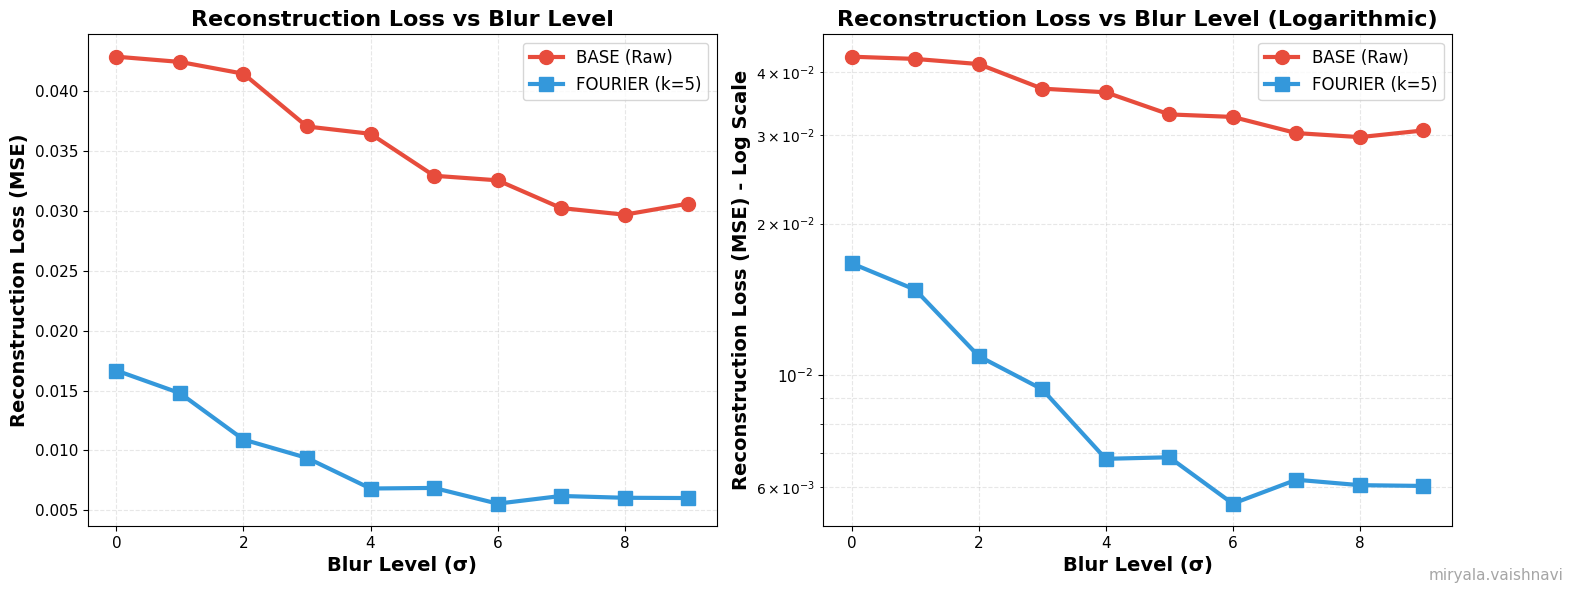


✓ Loss comparison plot saved: blur_loss_comparison_miryala.vaishnavi.png


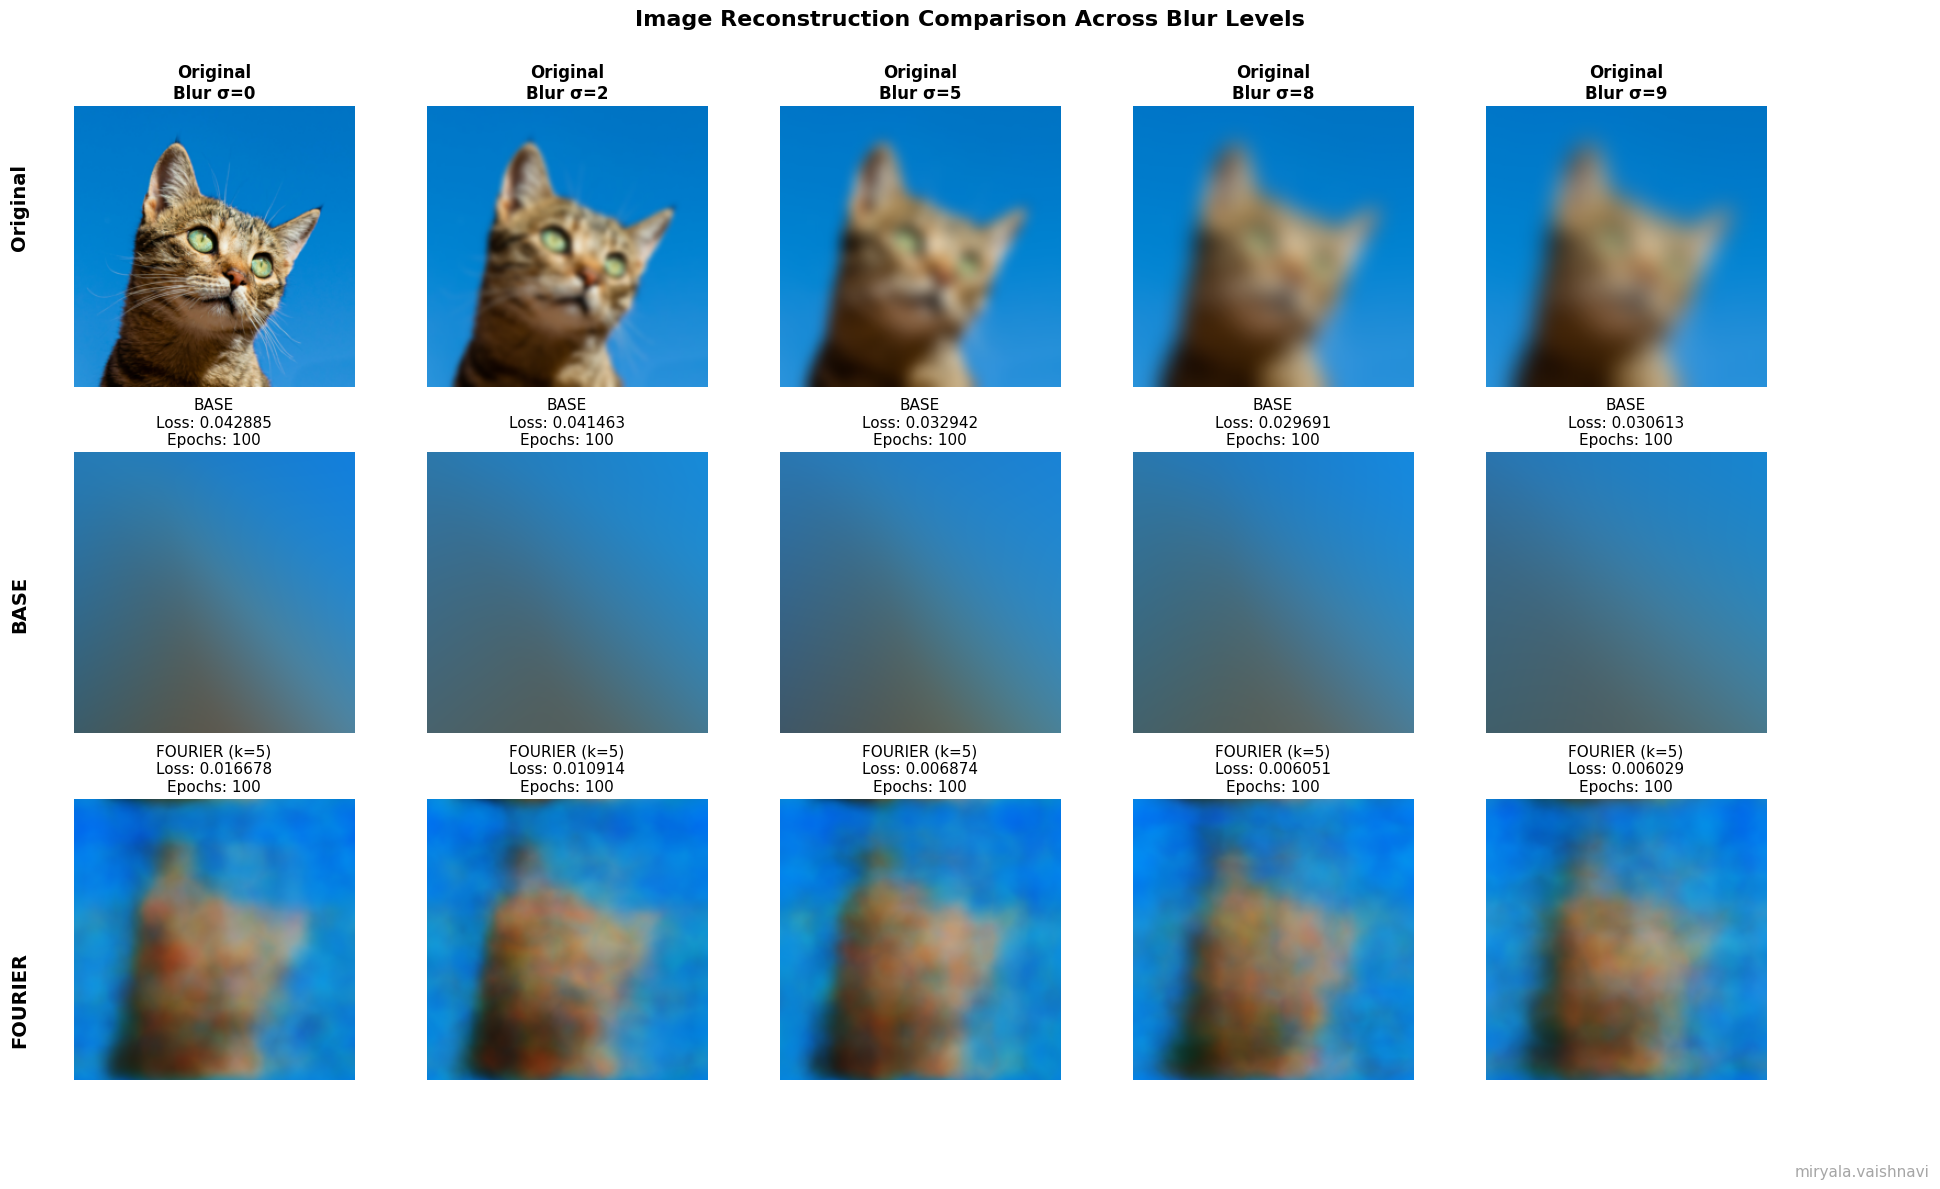

✓ Reconstruction comparison saved: blur_reconstructions_miryala.vaishnavi.png

                              CORRECTED ANALYSIS

1. DETAILED METRICS
------------------------------------------------------------------------------------------
Blur σ   BASE Loss    FOURIER Loss   Abs Gap      Rel Imp %    Interpretation
------------------------------------------------------------------------------------------
0        0.042885     0.016678       0.026207     61.11        Sharp - Fourier should excel
1        0.042448     0.014789       0.027660     65.16        Sharp - Fourier should excel
2        0.041463     0.010914       0.030549     73.68        Sharp - Fourier should excel
3        0.037056     0.009379       0.027678     74.69        Sharp - Fourier should excel
4        0.036444     0.006825       0.029619     81.27        Medium blur
5        0.032942     0.006874       0.026068     79.13        Medium blur
6        0.032561     0.005561       0.027000     82.92        Medium blu

{'blur_levels': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'losses_base': array([0.04288525, 0.04244848, 0.0414629 , 0.03705634, 0.03644412,
        0.0329419 , 0.03256095, 0.03024495, 0.02969055, 0.03061309]),
 'losses_fourier': array([0.01667779, 0.01478855, 0.01091377, 0.00937853, 0.00682485,
        0.00687359, 0.0055606 , 0.00620257, 0.00605066, 0.00602945]),
 'absolute_gap': array([0.02620746, 0.02765993, 0.03054913, 0.02767781, 0.02961927,
        0.0260683 , 0.02700036, 0.02404239, 0.02363988, 0.02458364]),
 'relative_improvement': array([61.11065522, 65.16117376, 73.67823527, 74.69115453, 81.27311649,
        79.13418894, 82.92250303, 79.49222311, 79.62090937, 80.30434037])}

In [29]:
# Create visualizations and analysis
# %pip install scipy
create_summary_table_V2(results_base, results_fourier, email)
plot_loss_comparison_V2(results_base, results_fourier, email)
visualize_reconstructions_V2(results_base, results_fourier, 
                             blur_levels_to_show=[0, 2, 5, 8, 9], 
                            email=email)
analyze_results_V2(results_base, results_fourier)
